In [ ]:
# imports
import warnings
import glob
import pickle as cPickle
import numpy as np
import matplotlib.pyplot as mpl
from sklearn.ensemble import RandomForestClassifier
from scipy.stats.stats import pearsonr
from sklearn.metrics import log_loss, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, hinge_loss, classification_report
from sklearn import model_selection
import random 

warnings.filterwarnings('default')

In [ ]:
# Plot history object
def plot_history(history):
    mpl.plot(history.history['loss'])
    mpl.plot(history.history['val_loss'])
    mpl.title('model loss')
    mpl.ylim([0,5])
    mpl.ylabel('loss')
    mpl.xlabel('epoch')
    mpl.legend(['train', 'val'], loc='upper right')
    mpl.show()
    #-------------
    
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    mpl.plot(history.history['accuracy'])
    mpl.plot(history.history['val_accuracy'])
    mpl.title('model accuracy')
    mpl.ylabel('accuracy')
    mpl.xlabel('epoch')
    mpl.legend(['train', 'test'], loc='upper left')
    mpl.show()
    # summarize history for loss
    mpl.plot(history.history['loss'])
    mpl.plot(history.history['val_loss'])
    mpl.title('model loss')
    mpl.ylabel('loss')
    mpl.xlabel('epoch')
    mpl.legend(['train', 'test'], loc='upper left')
    mpl.show()


In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.noise import GaussianNoise
from keras.optimizers import SGD, Adam, Adadelta

from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.regularizers import l2
from keras.layers.advanced_activations import ELU
from keras.layers.normalization import BatchNormalization
from sklearn import svm
from sklearn.utils import class_weight


ImportError: ignored

In [ ]:
def train_rf(tr_X, tr_y_cat, va_X):#, te_X):
    rf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
    rf.fit(tr_X, tr_y_cat)
    rf_tr_pred = rf.predict(tr_X)
    rf_va_pred = rf.predict(va_X)
   # rf_te_pred = rf.predict(te_X)

    return rf_tr_pred, rf_va_pred#, rf_te_pred

def train_svm(tr_X, tr_y_cat, va_X):
    clf = svm.SVC()
    clf.fit(tr_X, tr_y_cat)
    rf_tr_pred = clf.predict(tr_X)
    rf_va_pred = clf.predict(va_X)
    #rf_te_pred = clf.predict(te_X)

    return rf_tr_pred, rf_va_pred

from sklearn.neighbors import KNeighborsClassifier

def train_KNN(tr_X, tr_y_cat, va_X):
    classifier = KNeighborsClassifier(n_neighbors=1)
    classifier.fit(tr_X, tr_y_cat)
    rf_tr_pred = classifier.predict(tr_X)
    rf_va_pred = classifier.predict(va_X)
    #rf_te_pred = clf.predict(te_X)


    return rf_tr_pred, rf_va_pred

def train_lda(tr_X, tr_y_cat, va_X):
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
    classifier = LDA(n_components=1)
    classifier.fit(tr_X, tr_y_cat)
    rf_tr_pred = classifier.predict(tr_X)
    rf_va_pred = classifier.predict(va_X)
    #rf_te_pred = clf.predict(te_X)
    
    #tr_X = lda.fit_transform(tr_X,tr_y_cat)
    #va_X = lda.transform(va_X )
    #print(va_X.shape)


    return rf_tr_pred, rf_va_pred

# Train Models - SPLIT

In [ ]:
from sklearn.preprocessing import  MinMaxScaler , StandardScaler

def train_models(X, y, y_cat):
    
    
    ntrials = 42
    
    test_size = 0.2
    seed = 10
    
    
    ##########################################################################
    #Before split
    
    print("Before selectoin")
    print(X.shape)

    #sclae to 0,1
    min_max_scaler = StandardScaler() #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler
    X = min_max_scaler.fit_transform(X)
    """
    #feature selection LDA
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
    lda = LDA()
    X = lda.fit_transform(X,y_cat)

    """

    #feature selection PCA
    #from sklearn.decomposition import PCA
    #pca = PCA()
    #X = pca.fit_transform(X)


    #relive
    #fs = ReliefF(n_neighbors=100, n_features_to_keep=10)
    #X = fs.fit_transform(X, y_cat)

    print("After selectoin")
    print(X.shape)

     ##############################################################################
        
    
   
    #holdout
    tr_X, va_X, tr_y_cat, va_y_cat = model_selection.train_test_split(X, y_cat, test_size=test_size, 
                                                                        random_state=seed)
  
    print(va_X.shape)
    tr_y = np.eye(2)[np.array(tr_y_cat,dtype=np.int)]
    ##########################################################################
    #feature selection LDA after split
    #from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
    #lda = LDA(n_components=1)
    #tr_X = lda.fit_transform(tr_X,tr_y_cat)
    #va_X = lda.transform(va_X)
    #print("After")
    #print(tr_X.shape)


    #feature selection PCA
    #from sklearn.decomposition import PCA
    #pca = PCA()
    #tr_X = pca.fit_transform(tr_X)
    #va_X = pca.transform(va_X)
    ##############################################################################
    #tr_y = np.eye(2) [tr_y] # Me put 2 instead of 4
    
    #print (tr_y.shape)
    
    #va_y = map(int, va_y_cat) #M use astype instead of map
    #va_y = va_y_cat.astype(int)
    #va_y = np.eye(2)[va_y] # Me put 2 instead of 4
    #va_y = va_y.reshape(va_y.shape[0],2)
    va_y = np.eye(2)[np.array(va_y_cat,dtype=np.int)]

    #print (va_y.shape)
    
    class_we = class_weight.compute_class_weight('balanced', np.unique(tr_y_cat), tr_y_cat)
    average='weighted'

    
    # train net
    history, pr, tr_pr = train_dnn(tr_X, tr_y, va_X, va_y,  class_we)
    
    # visualize loss
    plot_history(history)
    print('DNN results')
    # calculate logloss metric
    tr_preds = np.argmax(tr_pr, axis=1)
    # calculate accuracy
    tr_acc = accuracy_score(tr_y_cat, tr_preds)
    tr_conf = confusion_matrix(tr_y_cat, tr_preds)

    # Recall, precision averaging method
    average='weighted'

    print('accuracy : {}'.format(tr_acc))
    print('Training Recall: {}'.format(recall_score(tr_y_cat, tr_preds, average=average)))
    print('Training Precision: {}'.format(precision_score(tr_y_cat, tr_preds, average=average)))
    print('Confusion matrix: ')
    print(tr_conf)

    # probabilites to one prediction
    preds = np.argmax(pr, axis=1)
    # calculate accuracy
    acc = accuracy_score(va_y_cat, preds)
    conf = confusion_matrix(va_y_cat, preds)

    print('Validation set report:')
    print('cross Loss: {}'.format(log_loss(va_y, pr))) # for cross _loss
    print('hing Loss: {}'.format(hinge_loss(va_y_cat, preds))) # for hinge_loss
    target_names = ['0', '1']
    print('Report{}'.format(classification_report(va_y_cat, preds,target_names=target_names)))
    print('accuracy : {}'.format(acc))
    print('Validation Recall: {}'.format(recall_score(va_y_cat, preds, average=average)))
    print('Validation Precision: {}'.format(precision_score(va_y_cat, preds, average=average)))
    print('Confusion matrix: ')
    print(conf)
   
    # probabilites to one prediction
    #te_preds = np.argmax(te_pr, axis=1)
    # calculate accuracy1
    #te_acc = accuracy_score(te_y_cat, te_preds)
    #te_conf = confusion_matrix(te_y_cat, te_preds)

    #print('\nTest set report:')
    #print('accuracy : {}'.format(te_acc))
    #print('Test Recall: {}'.format(recall_score(te_y_cat, te_preds, average=average)))
    #print('Test Precision: {}'.format(precision_score(te_y_cat, te_preds, average=average)))
    #print('Confusion matrix: ')
    #print(te_conf)
  
    rf_tr_pred, rf_va_pred = train_KNN(tr_X, tr_y_cat, va_X)

    print('\n\KNN Result\n')
    print('Train accuracy: {}'.format(accuracy_score(tr_y_cat, rf_tr_pred)))
    print('Training Recall: {}'.format(recall_score(tr_y_cat, rf_tr_pred, average=average)))
    print('Training Precision: {}'.format(precision_score(tr_y_cat, rf_tr_pred, average=average)))
    print('\n\nValidation accuracy: {}'.format(accuracy_score(va_y_cat, rf_va_pred)))
    print('Validation Recall: {}'.format(recall_score(va_y_cat, rf_va_pred, average=average)))
    print('Validation Precision: {}'.format(precision_score(va_y_cat, rf_va_pred, average=average)))
   
    print('\nTrain Confusion matrix:\n {}'.format(confusion_matrix(tr_y_cat, rf_tr_pred)))
    print('Validation Confusion matrix:\n {}'.format(confusion_matrix(va_y_cat, rf_va_pred)))
    #print('Test Confusion matrix:\n {}'.format(confusion_matrix(te_y_cat, rf_te_pred)))

    rf_tr_pred, rf_va_pred = train_svm(tr_X, tr_y_cat, va_X)

    print('\n\nSupport vector machine Result\n')
    print('Train accuracy: {}'.format(accuracy_score(tr_y_cat, rf_tr_pred)))
    print('Training Recall: {}'.format(recall_score(tr_y_cat, rf_tr_pred, average=average)))
    print('Training Precision: {}'.format(precision_score(tr_y_cat, rf_tr_pred, average=average)))
    print('\n\nValidation accuracy: {}'.format(accuracy_score(va_y_cat, rf_va_pred)))
    print('Validation Recall: {}'.format(recall_score(va_y_cat, rf_va_pred, average=average)))
    print('Validation Precision: {}'.format(precision_score(va_y_cat, rf_va_pred, average=average)))
    #print('\n\nTest accuracy: {}'.format(accuracy_score(te_y_cat, rf_te_pred)))
    #print('Test Recall: {}'.format(recall_score(te_y_cat, rf_te_pred, average=average)))
    #print('Test Precision: {}'.format(precision_score(te_y_cat, rf_te_pred, average=average)))

    print('\nTrain Confusion matrix:\n {}'.format(confusion_matrix(tr_y_cat, rf_tr_pred)))
    print('Validation Confusion matrix:\n {}'.format(confusion_matrix(va_y_cat, rf_va_pred)))
  
    
     rf_tr_pred, rf_va_pred = train_rf(tr_X, tr_y_cat, va_X)#, te_X)

    print('\n\nRandom Forest Result\n')
    print('Train accuracy: {}'.format(accuracy_score(tr_y_cat, rf_tr_pred)))
    print('Training Recall: {}'.format(recall_score(tr_y_cat, rf_tr_pred, average=average)))
    print('Training Precision: {}'.format(precision_score(tr_y_cat, rf_tr_pred, average=average)))
    print('\n\nValidation accuracy: {}'.format(accuracy_score(va_y_cat, rf_va_pred)))
    print('Validation Recall: {}'.format(recall_score(va_y_cat, rf_va_pred, average=average)))
    print('Validation Precision: {}'.format(precision_score(va_y_cat, rf_va_pred, average=average)))
  
    print('\nTrain Confusion matrix:\n {}'.format(confusion_matrix(tr_y_cat, rf_tr_pred)))
    print('Validation Confusion matrix:\n {}'.format(confusion_matrix(va_y_cat, rf_va_pred)))
    #print('Test Confusion matrix:\n {}'.format(confusion_matrix(te_y_cat, rf_te_pred)))

    lda_tr_pred, lda_va_pred = train_lda(tr_X, tr_y_cat, va_X)#, te_X)
    print('\n\nLDA Result\n')
    print('Train accuracy: {}'.format(accuracy_score(tr_y_cat, lda_tr_pred)))
    print('Training Recall: {}'.format(recall_score(tr_y_cat, lda_tr_pred, average=average)))
    print('Training Precision: {}'.format(precision_score(tr_y_cat, lda_tr_pred, average=average)))
    print('\n\nValidation accuracy: {}'.format(accuracy_score(va_y_cat, lda_va_pred)))
    print('Validation Recall: {}'.format(recall_score(va_y_cat, lda_va_pred, average=average)))
    print('Validation Precision: {}'.format(precision_score(va_y_cat, lda_va_pred, average=average)))
    #print('\n\nTest accuracy: {}'.format(accuracy_score(te_y_cat, rf_te_pred)))
    #print('Test Recall: {}'.format(recall_score(te_y_cat, rf_te_pred, average=average)))
    #print('Test Precision: {}'.format(precision_score(te_y_cat, rf_te_pred, average=average)))

    print('\nTrain Confusion matrix:\n {}'.format(confusion_matrix(tr_y_cat, lda_tr_pred)))
    print('Validation Confusion matrix:\n {}'.format(confusion_matrix(va_y_cat, lda_va_pred)))
   

<input>:153: DeprecationWarning: invalid escape sequence \K
<input>:153: DeprecationWarning: invalid escape sequence \K
<input>:153: DeprecationWarning: invalid escape sequence \K
<input>:153: DeprecationWarning: invalid escape sequence \K
<input>:153: DeprecationWarning: invalid escape sequence \K
<input>:153: DeprecationWarning: invalid escape sequence \K
<input>:153: DeprecationWarning: invalid escape sequence \K
<input>:153: DeprecationWarning: invalid escape sequence \K
<input>:153: DeprecationWarning: invalid escape sequence \K
<input>:153: DeprecationWarning: invalid escape sequence \K
<input>:153: DeprecationWarning: invalid escape sequence \K
<input>:153: DeprecationWarning: invalid escape sequence \K
<input>:153: DeprecationWarning: invalid escape sequence \K
<input>:153: DeprecationWarning: invalid escape sequence \K
<input>:153: DeprecationWarning: invalid escape sequence \K
<input>:153: DeprecationWarning: invalid escape sequence \K
<input>:153: DeprecationWarning: invalid

# Train Models, Kfolds, leave one out


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.neighbors import KNeighborsClassifier

#holdout
def train_models_kfold(X, y, y_cat): 


    batch_size = 128
    nb_epoch = 250#3000


    #sclae to 0,1
    min_max_scaler = MinMaxScaler() #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler
    X = min_max_scaler.fit_transform(X)
    
    
    #one-hot-encoded matrix
    y = np.eye(2)[np.array(y_cat,dtype=np.int)]

    # Stratified Kfold K=10 or (K = 1308 LEAVEone out)
    #accuracies =  model_selection.cross_val_score(estimator=classifier, X= X, y=y,cv=1308, n_jobs=-1)
    
    #split = model_selection.LeaveOneOut()#.split(X) # leave one out
    split = 5  # Kfold K=5
    
     
    classifier = KerasClassifier(build_fn=dnn_Kfold, batch_size=batch_size, nb_epoch=nb_epoch)
    accuracies =  model_selection.cross_val_score(estimator=classifier, X= X, y=y,cv=split, n_jobs=-1)
    
    print("accuracies", accuracies)
    #mean score and the 95% confidence interval of the score estimate are
    print("DNN Accuracy: %0.2f (+/- %0.2f)" % (accuracies.mean(), accuracies.std() * 2))


   #--------------- SVM 
    clf = svm.SVC()
    clf.fit(X, y_cat)
    accuracies =  model_selection.cross_val_score(estimator=clf, X= X, y=y_cat,cv=split, n_jobs=-1)
    print('\n\nSupport vector machine Result\n')
    print("accuracies", accuracies)
    #mean score and the 95% confidence interval of the score estimate are
    print("SVM Accuracy: %0.2f (+/- %0.2f)" % (accuracies.mean(), accuracies.std() * 2))
    
    # -------------- RF
    rf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
    rf.fit(X, y_cat)
    accuracies =  model_selection.cross_val_score(estimator=rf, X= X, y=y_cat,cv=split, n_jobs=-1)
    print('\n\nRandomForestClassifier Result\n')
    print("accuracies", accuracies)
    #mean score and the 95% confidence interval of the score estimate are
    print("Accuracy: %0.2f (+/- %0.2f)" % (accuracies.mean(), accuracies.std() * 2))


    #---------- KNN
    KNN = KNeighborsClassifier(n_neighbors=1)
    KNN.fit(X, y_cat)
    accuracies =  model_selection.cross_val_score(estimator=KNN, X= X, y=y_cat,cv=split, n_jobs=-1)
    print('\n\KNN (k=1) Result\n')
    print("accuracies", accuracies)
    #mean score and the 95% confidence interval of the score estimate are
    print("Accuracy: %0.2f (+/- %0.2f)" % (accuracies.mean(), accuracies.std() * 2))
    

<input>:59: DeprecationWarning: invalid escape sequence \K
<input>:59: DeprecationWarning: invalid escape sequence \K
<input>:59: DeprecationWarning: invalid escape sequence \K
<input>:59: DeprecationWarning: invalid escape sequence \K
<input>:59: DeprecationWarning: invalid escape sequence \K
<input>:59: DeprecationWarning: invalid escape sequence \K
<input>:59: DeprecationWarning: invalid escape sequence \K
<input>:59: DeprecationWarning: invalid escape sequence \K
<input>:59: DeprecationWarning: invalid escape sequence \K
<input>:59: DeprecationWarning: invalid escape sequence \K
<input>:59: DeprecationWarning: invalid escape sequence \K
<input>:59: DeprecationWarning: invalid escape sequence \K
<input>:59: DeprecationWarning: invalid escape sequence \K
<input>:59: DeprecationWarning: invalid escape sequence \K
<input>:59: DeprecationWarning: invalid escape sequence \K
<ipython-input-7-766f30858543>:59: DeprecationWarning: invalid escape sequence \K
  print('\n\KNN (k=1) Result\n')


## DNN_ Kfold/leaveone

In [ ]:
  
# a deep neural network to train one statistic (valence or arousal) at a time
def dnn_Kfold():#(tr_X, tr_y, va_X, va_y, class_we):

    # set parameters
       
    
    l1_decay=0.00
    l2_decay=0.000 # .5
    # 0.01  0.06
    sigma=0.005
    in_drop_rate = .5
    drop_rate = .5#.05
    lr1=0.0001


    #M Higge loss - change y from {0,1} to {-1,1}
    #tr_y[where(tr_y == 0)] = -1
    #va_y[where(va_y == 0)] = -1


    # set network layout
    model = Sequential()
    model.add(Dense(2367, input_shape=(X.shape[1],)
                    , kernel_initializer='he_normal', W_regularizer=l2(l2_decay)))
    model.add(GaussianNoise(sigma))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(in_drop_rate))


    model.add(Dense(1800, kernel_initializer='he_normal', W_regularizer=l2(l2_decay)))
    model.add(GaussianNoise(sigma))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(drop_rate))

    model.add(Dense(1300, kernel_initializer='he_normal', W_regularizer=l2(l2_decay)))
    model.add(GaussianNoise(sigma))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(drop_rate))

    model.add(Dense(800, kernel_initializer='he_normal', W_regularizer=l2(l2_decay)))
    model.add(GaussianNoise(sigma))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(drop_rate))

    
    model.add(Dense(2, W_regularizer=l2(l2_decay))) # me put 2 instead of 4
    #model.add(Activation('tanh')) # with hingre 
    model.add(Activation('softmax')) # with cross

    """# Callbacks
    model_checkpoint = ModelCheckpoint('best_modelf1d55RbT.hdf5', monitor='val_loss', save_best_only=True)
    early = EarlyStopping(monitor='val_loss', patience=600, verbose=0)
    
    """
    # fit and evaluate the model
    
    #model.compile(loss='hinge', # categorical_crossentropy #binary_crossentropy
    #              optimizer=Adam(lr=0.001))
 
    model.compile(loss='binary_crossentropy',
                  optimizer=Adam(lr=lr1), metrics=['accuracy']) # add metrics
    
    """history = model.fit(tr_X, tr_y, batch_size=batch_size,
                        epochs=nb_epoch, verbose=0,  callbacks=[early, model_checkpoint], 
                        validation_data=(va_X, va_y))
    
    #score = model.evaluate(va_X, va_y, verbose=0)
    #print('Test score:', score[0])
    #print('Test accuracy:', score[1])

    model.load_weights('best_modelf1d55RbT.hdf5')
    tr_pr = model.predict(tr_X, batch_size=batch_size, verbose=0)
    pr_y = model.predict(va_X, batch_size=batch_size, verbose=0)
    #te_pr = model.predict(te_X, batch_size=batch_size, verbose=0)

    return history, pr_y, tr_pr"""
    return model

In [ ]:
def train_rf(tr_X, tr_y_cat, va_X):#, te_X):
    rf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
    rf.fit(tr_X, tr_y_cat)
    rf_tr_pred = rf.predict(tr_X)
    rf_va_pred = rf.predict(va_X)
   # rf_te_pred = rf.predict(te_X)

    return rf_tr_pred, rf_va_pred#, rf_te_pred

In [ ]:
def train_svm(tr_X, tr_y_cat, va_X):
    clf = svm.SVC()
    clf.fit(tr_X, tr_y_cat)
    rf_tr_pred = clf.predict(tr_X)
    rf_va_pred = clf.predict(va_X)
    #rf_te_pred = clf.predict(te_X)

    return rf_tr_pred, rf_va_pred

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def train_lda(tr_X, tr_y_cat, va_X):
    clf = LinearDiscriminantAnalysis()
    clf.fit(tr_X, tr_y_cat)
    rf_tr_pred = clf.predict(tr_X)
    rf_va_pred = clf.predict(va_X)
    #rf_te_pred = clf.predict(te_X)
    return rf_tr_pred, rf_va_pred

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def train_KNN(tr_X, tr_y_cat, va_X):
    classifier = KNeighborsClassifier(n_neighbors=1)
    classifier.fit(tr_X, tr_y_cat)
    rf_tr_pred = classifier.predict(tr_X)
    rf_va_pred = classifier.predict(va_X)
    #rf_te_pred = clf.predict(te_X)


    return rf_tr_pred, rf_va_pred

# DNN 

In [ ]:
from numpy import where
   
# a deep neural network to train one statistic (valence or arousal) at a time
def train_dnn(tr_X, tr_y, va_X, va_y, class_we):

  
    batch_size = 128
    nb_epoch = 250 #3000
    l1_decay=0.00
    l2_decay=0.000 # .5
    # 0.01  0.06
    sigma=0.005
    in_drop_rate = .5
    drop_rate = .5#.05
    lr1=0.0001

        #my modified 
    model.add(Dense(1500, input_shape=(tr_X.shape[1],) ,init='he_normal', W_regularizer=l2(l2_decay)))
                    #, kernel_initializer=keras.initializers.RandomNormal'he_normal', kernel_regularizer=l2(l2_decay)))
    model.add(GaussianNoise(sigma))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(in_drop_rate))
    

    model.add(Dense(1000, init='he_normal', W_regularizer=l2(l2_decay)))
    model.add(GaussianNoise(sigma))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(drop_rate))

    model.add(Dense(600, init='he_normal', W_regularizer=l2(l2_decay)))
    model.add(GaussianNoise(sigma))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(drop_rate))

    model.add(Dense(400, init='he_normal', W_regularizer=l2(l2_decay)))
    model.add(GaussianNoise(sigma))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(drop_rate))
   

<input>:43: DeprecationWarning: invalid escape sequence \P
<input>:43: DeprecationWarning: invalid escape sequence \P
<input>:43: DeprecationWarning: invalid escape sequence \P
<input>:43: DeprecationWarning: invalid escape sequence \P
<input>:43: DeprecationWarning: invalid escape sequence \P
<input>:43: DeprecationWarning: invalid escape sequence \P
<input>:43: DeprecationWarning: invalid escape sequence \P
<input>:43: DeprecationWarning: invalid escape sequence \P
<input>:43: DeprecationWarning: invalid escape sequence \P
<input>:43: DeprecationWarning: invalid escape sequence \P
<input>:43: DeprecationWarning: invalid escape sequence \P
<input>:43: DeprecationWarning: invalid escape sequence \P
<input>:43: DeprecationWarning: invalid escape sequence \P
<input>:43: DeprecationWarning: invalid escape sequence \P
<input>:43: DeprecationWarning: invalid escape sequence \P
<input>:43: DeprecationWarning: invalid escape sequence \P
<input>:43: DeprecationWarning: invalid escape sequence 

# Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


# pref + valence
X = np.load('gdrive/My Drive/Python files/neuromarketing 25/features_psd_ALL.npy') 
useres =  np.load('gdrive/My Drive/Python files/neuromarketing 25/users.npy')


Mounted at /content/gdrive


In [ ]:

#REF
#idx_IN_columns = [2715,2716,2717,2718,2719,2720,2721,2722,2723, 2724]
#((vamv_valence, kirk_valence, ram12_valence, ram15_valence)), Touchette_AW,AW, Choice_Index_b,Choice_Index_g, effort_index, effort_index2))

#idx_IN_columns = [2704,2703,2702,2701,2700,2699,2698,2697,2696,2715,2716,2717,2718,2719,2720,2721,2722,2723, 2724] #last 20

idx_IN_columns = [2694, 2693, 2692, 2691, 2690, 2689, 2688, 2687, 2686,2704,2703,2702,2701,2700,2699,2698,2697,2696,2715,2716,2717,2718,2719,2720,2721,2722,2723, 2724] #last 30

X_copy = X
X = X[:,idx_IN_columns]

In [ ]:
X.shape

(1050, 2725)

In [ ]:
###valence - 2 label
y = np.load('gdrive/My Drive/Python files/neuromarketing 25/tow_labels_valence.npy')
y_cat = y[:,1].ravel()

#No Valence - 2 label
#y = np.load('gdrive/My Drive/Python files/neuromarketing 25/tow_labels.npy')
#y_cat = y[:,1].ravel()


In [ ]:
# remove valence

X = np.delete(X, [2715] , axis=1)
X.shape

In [ ]:

y.shape

In [ ]:
print('y:', y.shape)
print('x:', X.shape)
print('y_cat:', y_cat.shape)

y
np.any(np.isnan(X)) # check null value
#np.all(np.isfinite(X))
np.any(np.isnan(X))


In [ ]:
#Before removing nan values 
#number of like: 463 # 579  from label
print("like: {0} ".format(np.count_nonzero(y[:,0] == 1)))

#number of dislike: 587 # 471 from label
print("Dislike: {0} ".format(np.count_nonzero(y[:,0] == 0) ))

#After removing nan values 
#number of like: 463
print("like: {0} ".format(np.count_nonzero(y[:,0] == 1)))

#number of dislike: 587
print("Dislike: {0} ".format(np.count_nonzero(y[:,0] == 0) ))

#Plain - no feature Extraction

Before selectoin
(1050, 3072)
After selectoin
(1050, 3072)
(210, 3072)
Epoch 1/250
7/7 [==============================] - 1s 95ms/step - loss: 1.0087 - accuracy: 0.4845 - val_loss: 1.0133 - val_accuracy: 0.4810
Epoch 2/250
7/7 [==============================] - 1s 80ms/step - loss: 1.0188 - accuracy: 0.4929 - val_loss: 0.9745 - val_accuracy: 0.5524
Epoch 3/250
7/7 [==============================] - 1s 81ms/step - loss: 0.9667 - accuracy: 0.5417 - val_loss: 0.9451 - val_accuracy: 0.5667
Epoch 4/250
7/7 [==============================] - 1s 94ms/step - loss: 0.9529 - accuracy: 0.5524 - val_loss: 0.9247 - val_accuracy: 0.5667
Epoch 5/250
7/7 [==============================] - 1s 97ms/step - loss: 0.9290 - accuracy: 0.5548 - val_loss: 0.9088 - val_accuracy: 0.5571
Epoch 6/250
7/7 [==============================] - 1s 133ms/step - loss: 0.9490 - accuracy: 0.5381 - val_loss: 0.8961 - val_accuracy: 0.5857
Epoch 7/250
7/7 [==============================] - 1s 160ms/step - loss: 0.8864 - accura

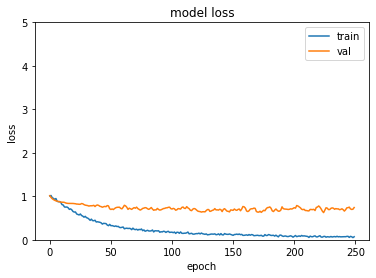

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


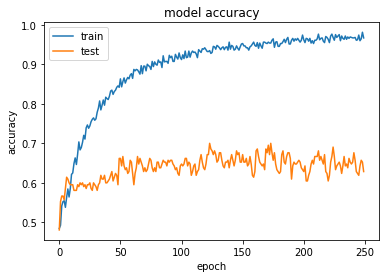

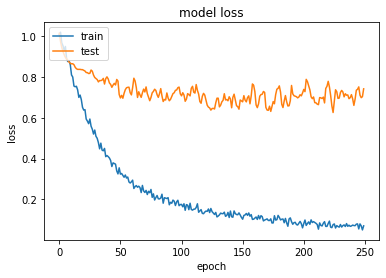

DNN results
accuracy : 0.9892857142857143
Training Recall: 0.9892857142857143
Training Precision: 0.9892859393529686
Confusion matrix: 
[[373   5]
 [  4 458]]
Validation set report:
cross Loss: -13.131515301622095
hing Loss: 0.7523809523809524
Report              precision    recall  f1-score   support

           0       0.68      0.56      0.62        93
           1       0.69      0.79      0.74       117

    accuracy                           0.69       210
   macro avg       0.69      0.68      0.68       210
weighted avg       0.69      0.69      0.69       210

accuracy : 0.6904761904761905
Validation Recall: 0.6904761904761905
Validation Precision: 0.6896812927841993
Confusion matrix: 
[[52 41]
 [24 93]]

\KNN Result

Train accuracy: 1.0
Training Recall: 1.0
Training Precision: 1.0


Validation accuracy: 0.6952380952380952
Validation Recall: 0.6952380952380952
Validation Precision: 0.7136397652526685

Train Confusion matrix:
 [[378   0]
 [  0 462]]
Validation Confusion matrix

In [ ]:
#X = np.load('gdrive/My Drive/Python files/neuromarketing 25/features_plain_128_ICA_SAV.npy')

train_models(X, y, y_cat)

Before selectoin
(1050, 3072)
After selectoin
(1050, 3072)
(210, 3072)
Epoch 1/250
7/7 [==============================] - 1s 106ms/step - loss: 0.9903 - accuracy: 0.5083 - val_loss: 0.9804 - val_accuracy: 0.5762
Epoch 2/250
7/7 [==============================] - 1s 91ms/step - loss: 0.9924 - accuracy: 0.4929 - val_loss: 0.9605 - val_accuracy: 0.5619
Epoch 3/250
7/7 [==============================] - 1s 84ms/step - loss: 0.9687 - accuracy: 0.5345 - val_loss: 0.9290 - val_accuracy: 0.5619
Epoch 4/250
7/7 [==============================] - 1s 96ms/step - loss: 0.9352 - accuracy: 0.5500 - val_loss: 0.9035 - val_accuracy: 0.5762
Epoch 5/250
7/7 [==============================] - 1s 97ms/step - loss: 0.9147 - accuracy: 0.5667 - val_loss: 0.8880 - val_accuracy: 0.5810
Epoch 6/250
7/7 [==============================] - 1s 129ms/step - loss: 0.8887 - accuracy: 0.5667 - val_loss: 0.8750 - val_accuracy: 0.6048
Epoch 7/250
7/7 [==============================] - 2s 223ms/step - loss: 0.9007 - accur

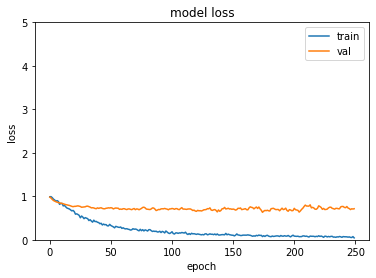

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


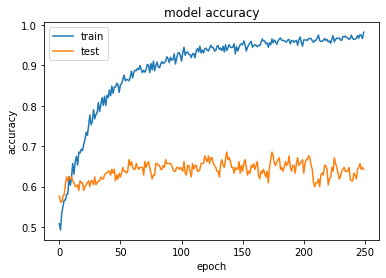

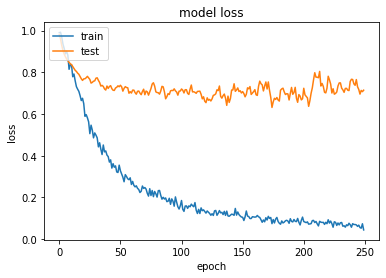

DNN results
accuracy : 0.9821428571428571
Training Recall: 0.9821428571428571
Training Precision: 0.9821548387096773
Confusion matrix: 
[[369   9]
 [  6 456]]
Validation set report:
cross Loss: -12.821598057342428
hing Loss: 0.7571428571428571
Report              precision    recall  f1-score   support

           0       0.68      0.56      0.61        93
           1       0.69      0.79      0.74       117

    accuracy                           0.69       210
   macro avg       0.68      0.67      0.67       210
weighted avg       0.68      0.69      0.68       210

accuracy : 0.6857142857142857
Validation Recall: 0.6857142857142857
Validation Precision: 0.6844644077726785
Confusion matrix: 
[[52 41]
 [25 92]]

\KNN Result

Train accuracy: 1.0
Training Recall: 1.0
Training Precision: 1.0


Validation accuracy: 0.6952380952380952
Validation Recall: 0.6952380952380952
Validation Precision: 0.7136397652526685

Train Confusion matrix:
 [[378   0]
 [  0 462]]
Validation Confusion matrix

In [ ]:
#X = np.load('gdrive/My Drive/Python files/neuromarketing 25/features_plain_128_SAV.npy')

train_models(X, y, y_cat)

#  PSD

Before selectoin
(1050, 2725)
After selectoin
(1050, 2725)
(210, 2725)
Epoch 1/250
7/7 [==============================] - 1s 93ms/step - loss: 0.9663 - accuracy: 0.5167 - val_loss: 0.9311 - val_accuracy: 0.6714
Epoch 2/250
7/7 [==============================] - 0s 69ms/step - loss: 0.8358 - accuracy: 0.6345 - val_loss: 0.8423 - val_accuracy: 0.7095
Epoch 3/250
7/7 [==============================] - 1s 106ms/step - loss: 0.7454 - accuracy: 0.6667 - val_loss: 0.7650 - val_accuracy: 0.7143
Epoch 4/250
7/7 [==============================] - 2s 311ms/step - loss: 0.6705 - accuracy: 0.7024 - val_loss: 0.6981 - val_accuracy: 0.6952
Epoch 5/250
7/7 [==============================] - 1s 81ms/step - loss: 0.6118 - accuracy: 0.7381 - val_loss: 0.6231 - val_accuracy: 0.7857
Epoch 6/250
7/7 [==============================] - 1s 78ms/step - loss: 0.5318 - accuracy: 0.7774 - val_loss: 0.5490 - val_accuracy: 0.8238
Epoch 7/250
7/7 [==============================] - 1s 94ms/step - loss: 0.5049 - accura

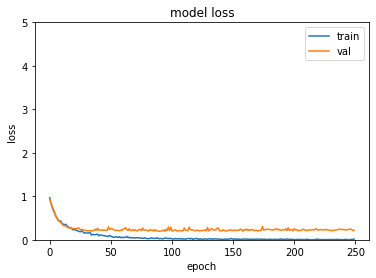

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


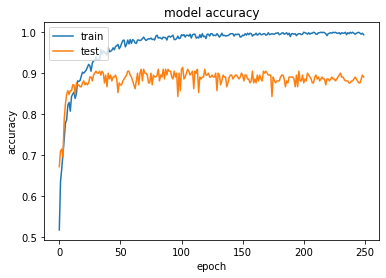

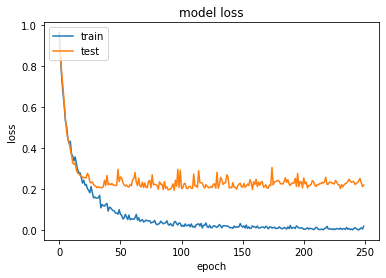

DNN results
accuracy : 0.9976190476190476
Training Recall: 0.9976190476190476
Training Precision: 0.9976293103448275
Confusion matrix: 
[[376   2]
 [  0 462]]
Validation set report:
cross Loss: -27.968195897908437
hing Loss: 0.5380952380952381
Report              precision    recall  f1-score   support

           0       0.90      0.88      0.89        93
           1       0.91      0.92      0.92       117

    accuracy                           0.90       210
   macro avg       0.90      0.90      0.90       210
weighted avg       0.90      0.90      0.90       210

accuracy : 0.9047619047619048
Validation Recall: 0.9047619047619048
Validation Precision: 0.9047003416751317
Confusion matrix: 
[[ 82  11]
 [  9 108]]

\KNN Result

Train accuracy: 1.0
Training Recall: 1.0
Training Precision: 1.0


Validation accuracy: 0.8095238095238095
Validation Recall: 0.8095238095238095
Validation Precision: 0.8160544217687075

Train Confusion matrix:
 [[378   0]
 [  0 462]]
Validation Confusion ma

In [ ]:
# all PSD no FS + LDA classification
train_models(X, y, y_cat)

## feature selection on ALL datat - valence labels

In [ ]:
#REF for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
n_scores = cross_val_score(pipeline, X, y_cat, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 1.000 (0.000)


In [ ]:
# fit the model n_features_to_select=10
rfe.fit(X, y_cat)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 2716.000
Column: 1, Selected False, Rank: 2715.000
Column: 2, Selected False, Rank: 2714.000
Column: 3, Selected False, Rank: 2713.000
Column: 4, Selected False, Rank: 2712.000
Column: 5, Selected False, Rank: 2711.000
Column: 6, Selected False, Rank: 2710.000
Column: 7, Selected False, Rank: 2709.000
Column: 8, Selected False, Rank: 2708.000
Column: 9, Selected False, Rank: 2707.000
Column: 10, Selected False, Rank: 2706.000
Column: 11, Selected False, Rank: 2705.000
Column: 12, Selected False, Rank: 2704.000
Column: 13, Selected False, Rank: 2703.000
Column: 14, Selected False, Rank: 2702.000
Column: 15, Selected False, Rank: 2701.000
Column: 16, Selected False, Rank: 2700.000
Column: 17, Selected False, Rank: 2699.000
Column: 18, Selected False, Rank: 2698.000
Column: 19, Selected False, Rank: 2697.000
Column: 20, Selected False, Rank: 2696.000
Column: 21, Selected False, Rank: 2695.000
Column: 22, Selected False, Rank: 2694.000
Column: 23, Selected 

In [ ]:
# fit the model n_features_to_select=1
rfe.fit(X, y_cat)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 2725.000
Column: 1, Selected False, Rank: 2724.000
Column: 2, Selected False, Rank: 2723.000
Column: 3, Selected False, Rank: 2722.000
Column: 4, Selected False, Rank: 2721.000
Column: 5, Selected False, Rank: 2720.000
Column: 6, Selected False, Rank: 2719.000
Column: 7, Selected False, Rank: 2718.000
Column: 8, Selected False, Rank: 2717.000
Column: 9, Selected False, Rank: 2716.000
Column: 10, Selected False, Rank: 2715.000
Column: 11, Selected False, Rank: 2714.000
Column: 12, Selected False, Rank: 2713.000
Column: 13, Selected False, Rank: 2712.000
Column: 14, Selected False, Rank: 2711.000
Column: 15, Selected False, Rank: 2710.000
Column: 16, Selected False, Rank: 2709.000
Column: 17, Selected False, Rank: 2708.000
Column: 18, Selected False, Rank: 2707.000
Column: 19, Selected False, Rank: 2706.000
Column: 20, Selected False, Rank: 2705.000
Column: 21, Selected False, Rank: 2704.000
Column: 22, Selected False, Rank: 2703.000
Column: 23, Selected 

### Releif

Before selectoin
(1050, 2725)
After selectoin
(1050, 3)
(210, 3)
Epoch 1/250
7/7 [==============================] - 0s 62ms/step - loss: 0.8152 - accuracy: 0.6274 - val_loss: 0.5245 - val_accuracy: 0.8524
Epoch 2/250
7/7 [==============================] - 0s 36ms/step - loss: 0.5491 - accuracy: 0.7583 - val_loss: 0.4193 - val_accuracy: 0.8524
Epoch 3/250
7/7 [==============================] - 3s 384ms/step - loss: 0.4501 - accuracy: 0.7881 - val_loss: 0.3644 - val_accuracy: 0.8571
Epoch 4/250
7/7 [==============================] - 2s 254ms/step - loss: 0.4494 - accuracy: 0.7881 - val_loss: 0.3367 - val_accuracy: 0.8667
Epoch 5/250
7/7 [==============================] - 0s 48ms/step - loss: 0.4315 - accuracy: 0.7940 - val_loss: 0.3223 - val_accuracy: 0.8667
Epoch 6/250
7/7 [==============================] - 0s 43ms/step - loss: 0.4322 - accuracy: 0.7929 - val_loss: 0.3142 - val_accuracy: 0.8667
Epoch 7/250
7/7 [==============================] - 0s 42ms/step - loss: 0.4385 - accuracy: 0.

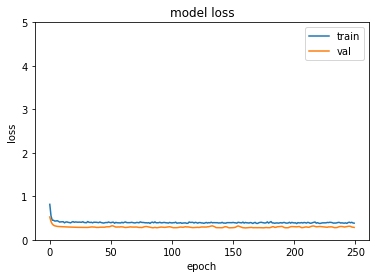

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


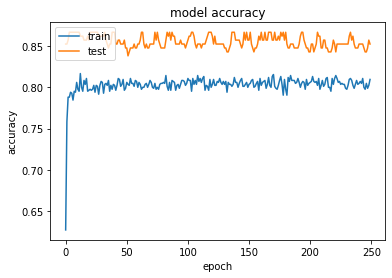

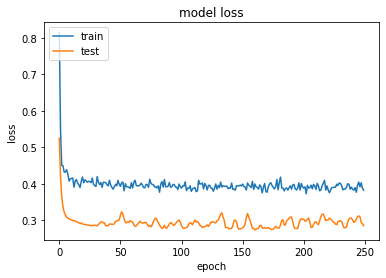

DNN results
accuracy : 0.8047619047619048
Training Recall: 0.8047619047619048
Training Precision: 0.8044476724078302
Confusion matrix: 
[[290  88]
 [ 76 386]]
Validation set report:
cross Loss: -25.317069535028367
hing Loss: 0.5761904761904761
Report              precision    recall  f1-score   support

           0       0.84      0.86      0.85        93
           1       0.89      0.87      0.88       117

    accuracy                           0.87       210
   macro avg       0.86      0.87      0.87       210
weighted avg       0.87      0.87      0.87       210

accuracy : 0.8666666666666667
Validation Recall: 0.8666666666666667
Validation Precision: 0.8670938215102975
Confusion matrix: 
[[ 80  13]
 [ 15 102]]

\KNN Result

Train accuracy: 1.0
Training Recall: 1.0
Training Precision: 1.0


Validation accuracy: 0.7952380952380952
Validation Recall: 0.7952380952380952
Validation Precision: 0.794781243346817

Train Confusion matrix:
 [[378   0]
 [  0 462]]
Validation Confusion mat

In [ ]:
!pip install ReliefF
from ReliefF import ReliefF

#Releif
train_models(X, y, y_cat) # 3 feature to keep

Before selectoin
(1050, 2725)
After selectoin
(1050, 10)
(210, 10)
Epoch 1/250
7/7 [==============================] - 0s 58ms/step - loss: 0.8173 - accuracy: 0.6310 - val_loss: 0.7022 - val_accuracy: 0.8429
Epoch 2/250
7/7 [==============================] - 3s 390ms/step - loss: 0.5695 - accuracy: 0.7643 - val_loss: 0.5471 - val_accuracy: 0.8524
Epoch 3/250
7/7 [==============================] - 0s 49ms/step - loss: 0.4729 - accuracy: 0.7762 - val_loss: 0.4527 - val_accuracy: 0.8571
Epoch 4/250
7/7 [==============================] - 0s 46ms/step - loss: 0.4621 - accuracy: 0.7786 - val_loss: 0.3995 - val_accuracy: 0.8571
Epoch 5/250
7/7 [==============================] - 0s 40ms/step - loss: 0.4395 - accuracy: 0.7893 - val_loss: 0.3706 - val_accuracy: 0.8571
Epoch 6/250
7/7 [==============================] - 0s 47ms/step - loss: 0.4337 - accuracy: 0.7952 - val_loss: 0.3525 - val_accuracy: 0.8571
Epoch 7/250
7/7 [==============================] - 0s 48ms/step - loss: 0.4261 - accuracy: 0

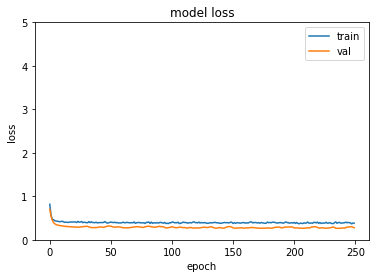

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


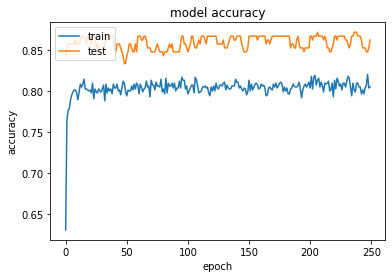

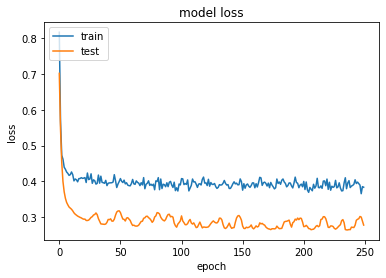

DNN results
accuracy : 0.7988095238095239
Training Recall: 0.7988095238095239
Training Precision: 0.7984823521956783
Confusion matrix: 
[[288  90]
 [ 79 383]]
Validation set report:
cross Loss: -25.49292807806106
hing Loss: 0.5714285714285714
Report              precision    recall  f1-score   support

           0       0.85      0.86      0.86        93
           1       0.89      0.88      0.88       117

    accuracy                           0.87       210
   macro avg       0.87      0.87      0.87       210
weighted avg       0.87      0.87      0.87       210

accuracy : 0.8714285714285714
Validation Recall: 0.8714285714285714
Validation Precision: 0.8716041295461691
Confusion matrix: 
[[ 80  13]
 [ 14 103]]

\KNN Result

Train accuracy: 1.0
Training Recall: 1.0
Training Precision: 1.0


Validation accuracy: 0.7619047619047619
Validation Recall: 0.7619047619047619
Validation Precision: 0.7633297274753346

Train Confusion matrix:
 [[378   0]
 [  0 462]]
Validation Confusion mat

In [ ]:

#Releif
train_models(X, y, y_cat) # 10 feature to keep

### MRMR 

In [ ]:
strings = ['2715', '191', '516', '265', '201', '1035', '2719', '2724', '2', '1295'] #10 MIQ
idx_IN_columns = [int(s) for s in strings]


X = X[:,idx_IN_columns]



Before selectoin
(1050, 10)
After selectoin
(1050, 10)
(210, 10)
Epoch 1/250
7/7 [==============================] - 0s 69ms/step - loss: 0.7975 - accuracy: 0.6440 - val_loss: 0.6132 - val_accuracy: 0.7857
Epoch 2/250
7/7 [==============================] - 0s 39ms/step - loss: 0.4140 - accuracy: 0.8536 - val_loss: 0.3455 - val_accuracy: 0.8952
Epoch 3/250
7/7 [==============================] - 3s 421ms/step - loss: 0.2704 - accuracy: 0.9024 - val_loss: 0.2407 - val_accuracy: 0.9333
Epoch 4/250
7/7 [==============================] - 2s 221ms/step - loss: 0.2390 - accuracy: 0.9048 - val_loss: 0.1903 - val_accuracy: 0.9238
Epoch 5/250
7/7 [==============================] - 1s 75ms/step - loss: 0.1778 - accuracy: 0.9333 - val_loss: 0.1644 - val_accuracy: 0.9238
Epoch 6/250
7/7 [==============================] - 0s 51ms/step - loss: 0.1871 - accuracy: 0.9298 - val_loss: 0.1481 - val_accuracy: 0.9333
Epoch 7/250
7/7 [==============================] - 0s 48ms/step - loss: 0.1478 - accuracy: 0.

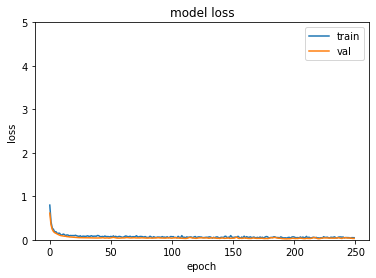

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


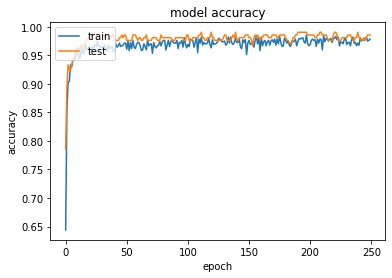

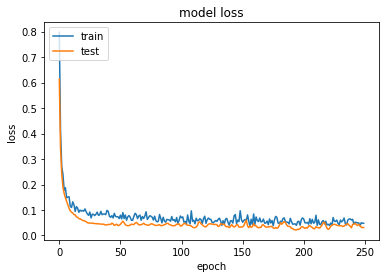

DNN results
accuracy : 0.9904761904761905
Training Recall: 0.9904761904761905
Training Precision: 0.9904919908466819
Confusion matrix: 
[[375   3]
 [  5 457]]
Validation set report:
cross Loss: -33.87835157485235
hing Loss: 0.4523809523809524
Report              precision    recall  f1-score   support

           0       1.00      0.98      0.99        93
           1       0.98      1.00      0.99       117

    accuracy                           0.99       210
   macro avg       0.99      0.99      0.99       210
weighted avg       0.99      0.99      0.99       210

accuracy : 0.9904761904761905
Validation Recall: 0.9904761904761905
Validation Precision: 0.9906362545018007
Confusion matrix: 
[[ 91   2]
 [  0 117]]

\KNN Result

Train accuracy: 1.0
Training Recall: 1.0
Training Precision: 1.0


Validation accuracy: 0.9428571428571428
Validation Recall: 0.9428571428571428
Validation Precision: 0.9439625135167609

Train Confusion matrix:
 [[378   0]
 [  0 462]]
Validation Confusion mat

In [ ]:
#on 10 feature
train_models(X, y, y_cat)

### REF (prefrence measure)

Before selectoin
(1050, 28)
After selectoin
(1050, 28)
(210, 28)
Epoch 1/250
7/7 [==============================] - 0s 58ms/step - loss: 0.8116 - accuracy: 0.6321 - val_loss: 0.5414 - val_accuracy: 0.8429
Epoch 2/250
7/7 [==============================] - 3s 385ms/step - loss: 0.5295 - accuracy: 0.8071 - val_loss: 0.4112 - val_accuracy: 0.8524
Epoch 3/250
7/7 [==============================] - 2s 238ms/step - loss: 0.4190 - accuracy: 0.8321 - val_loss: 0.3396 - val_accuracy: 0.8714
Epoch 4/250
7/7 [==============================] - 0s 50ms/step - loss: 0.3400 - accuracy: 0.8750 - val_loss: 0.2862 - val_accuracy: 0.9000
Epoch 5/250
7/7 [==============================] - 0s 41ms/step - loss: 0.2593 - accuracy: 0.9024 - val_loss: 0.2468 - val_accuracy: 0.9190
Epoch 6/250
7/7 [==============================] - 0s 42ms/step - loss: 0.2445 - accuracy: 0.9226 - val_loss: 0.2197 - val_accuracy: 0.9286
Epoch 7/250
7/7 [==============================] - 0s 44ms/step - loss: 0.2418 - accuracy: 0.

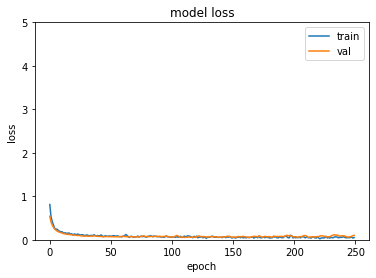

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


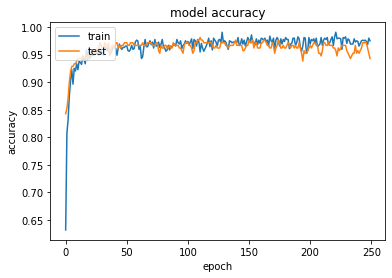

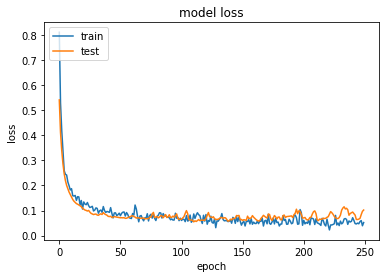

DNN results
accuracy : 0.9916666666666667
Training Recall: 0.9916666666666667
Training Precision: 0.9916860215053764
Confusion matrix: 
[[373   5]
 [  2 460]]
Validation set report:
cross Loss: -33.20590602329799
hing Loss: 0.46190476190476193
Report              precision    recall  f1-score   support

           0       0.99      0.97      0.98        93
           1       0.97      0.99      0.98       117

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210

accuracy : 0.9809523809523809
Validation Recall: 0.9809523809523809
Validation Precision: 0.981087819743282
Confusion matrix: 
[[ 90   3]
 [  1 116]]

\KNN Result

Train accuracy: 1.0
Training Recall: 1.0
Training Precision: 1.0


Validation accuracy: 0.9047619047619048
Validation Recall: 0.9047619047619048
Validation Precision: 0.9047619047619048

Train Confusion matrix:
 [[378   0]
 [  0 462]]
Validation Confusion mat

In [ ]:
#on 30 feature +LDA
train_models(X, y, y_cat)

Before selectoin
(1050, 28)
After selectoin
(1050, 28)
Epoch 1/250
7/7 [==============================] - 0s 56ms/step - loss: 0.8657 - accuracy: 0.6226 - val_loss: 0.5063 - val_accuracy: 0.8190
Epoch 2/250
7/7 [==============================] - 3s 391ms/step - loss: 0.5223 - accuracy: 0.8083 - val_loss: 0.4038 - val_accuracy: 0.8476
Epoch 3/250
7/7 [==============================] - 0s 51ms/step - loss: 0.3751 - accuracy: 0.8524 - val_loss: 0.3487 - val_accuracy: 0.8810
Epoch 4/250
7/7 [==============================] - 0s 44ms/step - loss: 0.3196 - accuracy: 0.8893 - val_loss: 0.2966 - val_accuracy: 0.9048
Epoch 5/250
7/7 [==============================] - 0s 47ms/step - loss: 0.2640 - accuracy: 0.9048 - val_loss: 0.2572 - val_accuracy: 0.9143
Epoch 6/250
7/7 [==============================] - 0s 48ms/step - loss: 0.2459 - accuracy: 0.9095 - val_loss: 0.2268 - val_accuracy: 0.9286
Epoch 7/250
7/7 [==============================] - 0s 44ms/step - loss: 0.2204 - accuracy: 0.9143 - val_

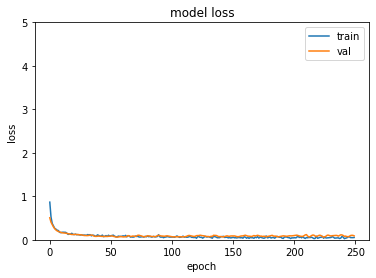

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


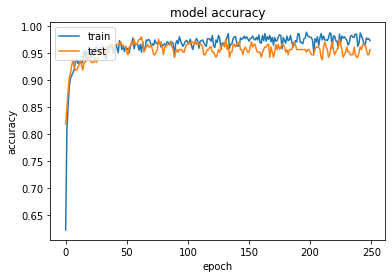

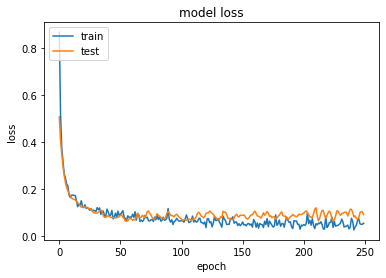

DNN results
accuracy : 0.9952380952380953
Training Recall: 0.9952380952380953
Training Precision: 0.9952380952380953
Confusion matrix: 
[[376   2]
 [  2 460]]
Validation set report:
cross Loss: -32.87842655976613
hing Loss: 0.4666666666666667
Report              precision    recall  f1-score   support

           0       0.98      0.97      0.97        93
           1       0.97      0.98      0.98       117

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210

accuracy : 0.9761904761904762
Validation Recall: 0.9761904761904762
Validation Precision: 0.9762080218970417
Confusion matrix: 
[[ 90   3]
 [  2 115]]

\KNN Result

Train accuracy: 1.0
Training Recall: 1.0
Training Precision: 1.0


Validation accuracy: 0.9047619047619048
Validation Recall: 0.9047619047619048
Validation Precision: 0.9047619047619048

Train Confusion matrix:
 [[378   0]
 [  0 462]]
Validation Confusion mat

In [ ]:
#on 30 feature
train_models(X, y, y_cat)

Before selectoin
(1050, 19)
After selectoin
(1050, 19)
Epoch 1/250
7/7 [==============================] - 0s 58ms/step - loss: 0.8549 - accuracy: 0.6083 - val_loss: 0.5096 - val_accuracy: 0.8190
Epoch 2/250
7/7 [==============================] - 3s 391ms/step - loss: 0.5200 - accuracy: 0.8036 - val_loss: 0.3859 - val_accuracy: 0.8381
Epoch 3/250
7/7 [==============================] - 0s 44ms/step - loss: 0.3786 - accuracy: 0.8643 - val_loss: 0.3191 - val_accuracy: 0.8762
Epoch 4/250
7/7 [==============================] - 0s 44ms/step - loss: 0.3027 - accuracy: 0.8929 - val_loss: 0.2711 - val_accuracy: 0.9048
Epoch 5/250
7/7 [==============================] - 0s 40ms/step - loss: 0.2777 - accuracy: 0.8917 - val_loss: 0.2339 - val_accuracy: 0.9143
Epoch 6/250
7/7 [==============================] - 0s 45ms/step - loss: 0.2331 - accuracy: 0.9155 - val_loss: 0.2073 - val_accuracy: 0.9238
Epoch 7/250
7/7 [==============================] - 0s 41ms/step - loss: 0.2023 - accuracy: 0.9274 - val_

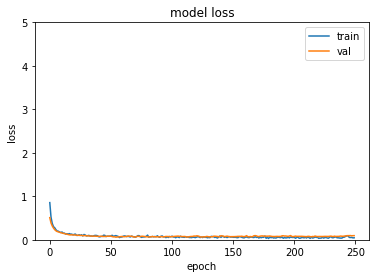

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


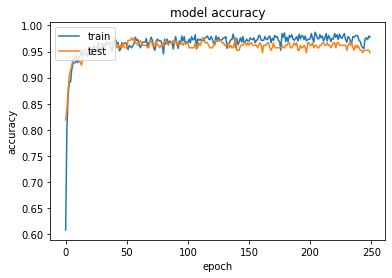

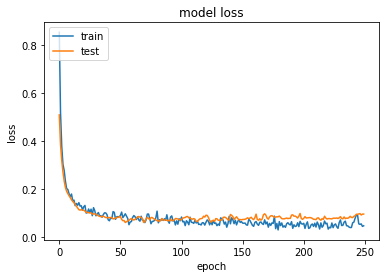

DNN results
accuracy : 0.9880952380952381
Training Recall: 0.9880952380952381
Training Precision: 0.9882963182762321
Confusion matrix: 
[[377   1]
 [  9 453]]
Validation set report:
cross Loss: -32.8849648819438
hing Loss: 0.4666666666666667
Report              precision    recall  f1-score   support

           0       0.98      0.97      0.97        93
           1       0.97      0.98      0.98       117

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210

accuracy : 0.9761904761904762
Validation Recall: 0.9761904761904762
Validation Precision: 0.9762080218970417
Confusion matrix: 
[[ 90   3]
 [  2 115]]

\KNN Result

Train accuracy: 1.0
Training Recall: 1.0
Training Precision: 1.0


Validation accuracy: 0.9047619047619048
Validation Recall: 0.9047619047619048
Validation Precision: 0.9051193200392285

Train Confusion matrix:
 [[378   0]
 [  0 462]]
Validation Confusion matr

In [ ]:
#on 20 feature
train_models(X, y, y_cat)

Before selectoin
(1050, 10)
After selectoin
(1050, 10)
Epoch 1/250
7/7 [==============================] - 0s 63ms/step - loss: 0.7692 - accuracy: 0.6881 - val_loss: 0.6444 - val_accuracy: 0.7810
Epoch 2/250
7/7 [==============================] - 0s 34ms/step - loss: 0.5058 - accuracy: 0.8131 - val_loss: 0.4294 - val_accuracy: 0.8476
Epoch 3/250
7/7 [==============================] - 3s 411ms/step - loss: 0.3560 - accuracy: 0.8679 - val_loss: 0.3075 - val_accuracy: 0.8857
Epoch 4/250
7/7 [==============================] - 2s 255ms/step - loss: 0.2997 - accuracy: 0.8988 - val_loss: 0.2572 - val_accuracy: 0.8952
Epoch 5/250
7/7 [==============================] - 0s 49ms/step - loss: 0.2707 - accuracy: 0.8869 - val_loss: 0.2276 - val_accuracy: 0.9143
Epoch 6/250
7/7 [==============================] - 0s 51ms/step - loss: 0.2252 - accuracy: 0.9214 - val_loss: 0.2014 - val_accuracy: 0.9286
Epoch 7/250
7/7 [==============================] - 0s 45ms/step - loss: 0.2036 - accuracy: 0.9333 - val

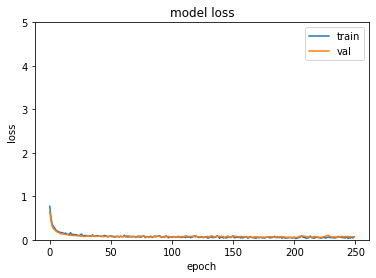

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


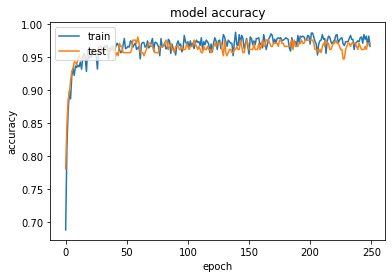

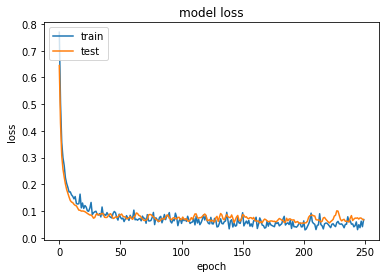

DNN results
accuracy : 0.9952380952380953
Training Recall: 0.9952380952380953
Training Precision: 0.995247157006603
Confusion matrix: 
[[375   3]
 [  1 461]]
Validation set report:
cross Loss: -32.888288098289856
hing Loss: 0.4666666666666667
Report              precision    recall  f1-score   support

           0       0.99      0.96      0.97        93
           1       0.97      0.99      0.98       117

    accuracy                           0.98       210
   macro avg       0.98      0.97      0.98       210
weighted avg       0.98      0.98      0.98       210

accuracy : 0.9761904761904762
Validation Recall: 0.9761904761904762
Validation Precision: 0.9765079365079364
Confusion matrix: 
[[ 89   4]
 [  1 116]]

\KNN Result

Train accuracy: 1.0
Training Recall: 1.0
Training Precision: 1.0


Validation accuracy: 0.9142857142857143
Validation Recall: 0.9142857142857143
Validation Precision: 0.9142857142857143

Train Confusion matrix:
 [[378   0]
 [  0 462]]
Validation Confusion mat

In [ ]:
#on 10 feature
train_models(X, y, y_cat)

### LDA

Before selectoin
(1050, 2725)
After selectoin
(1050, 2725)
(210, 1)
Epoch 1/250
7/7 [==============================] - 0s 62ms/step - loss: 0.4084 - accuracy: 0.8655 - val_loss: 0.5829 - val_accuracy: 0.7095
Epoch 2/250
7/7 [==============================] - 3s 395ms/step - loss: 0.0477 - accuracy: 0.9833 - val_loss: 0.5822 - val_accuracy: 0.7095
Epoch 3/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0377 - accuracy: 0.9845 - val_loss: 0.5832 - val_accuracy: 0.7095
Epoch 4/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0311 - accuracy: 0.9857 - val_loss: 0.5856 - val_accuracy: 0.7095
Epoch 5/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0270 - accuracy: 0.9869 - val_loss: 0.5854 - val_accuracy: 0.7095
Epoch 6/250
7/7 [==============================] - 0s 10ms/step - loss: 0.0245 - accuracy: 0.9917 - val_loss: 0.5854 - val_accuracy: 0.7095
Epoch 7/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0218 - accuracy: 

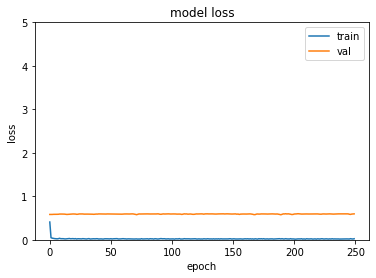

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


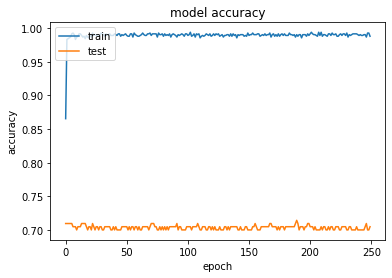

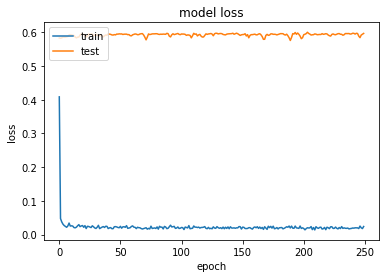

DNN results
accuracy : 0.9916666666666667
Training Recall: 0.9916666666666667
Training Precision: 0.9916979740277564
Confusion matrix: 
[[376   2]
 [  5 457]]
Validation set report:
cross Loss: -14.64312911047822
hing Loss: 0.7285714285714285
Report              precision    recall  f1-score   support

           0       0.65      0.75      0.70        93
           1       0.78      0.68      0.73       117

    accuracy                           0.71       210
   macro avg       0.72      0.72      0.71       210
weighted avg       0.72      0.71      0.72       210

accuracy : 0.7142857142857143
Validation Recall: 0.7142857142857143
Validation Precision: 0.7224519423956861
Confusion matrix: 
[[70 23]
 [37 80]]

\KNN Result

Train accuracy: 1.0
Training Recall: 1.0
Training Precision: 1.0


Validation accuracy: 0.7142857142857143
Validation Recall: 0.7142857142857143
Validation Precision: 0.7208163265306122

Train Confusion matrix:
 [[378   0]
 [  0 462]]
Validation Confusion matrix:

In [ ]:
#split lda into train test 
"""

hing
 
cross Loss: 0.25
X = np.load('gdrive/My Drive/Python files/neuromarketing 25/features_psd_ALL.npy') # 2725

Standard

    batch_size = 128
    nb_epoch = 250 #3000
    l1_decay=0.00
    l2_decay=0.000 # .5
    # 0.01  0.06
    sigma=0.005
    in_drop_rate = .5
    drop_rate = .5#.05
    lr1=0.0001

"""
train_models(X, y, y_cat)

Before selectoin
(1050, 2725)
After selectoin
(1050, 2725)
(210, 1)
Epoch 1/250
7/7 [==============================] - 0s 67ms/step - loss: 0.4354 - accuracy: 0.8310 - val_loss: 0.5846 - val_accuracy: 0.7095
Epoch 2/250
7/7 [==============================] - 3s 454ms/step - loss: 0.0535 - accuracy: 0.9857 - val_loss: 0.5837 - val_accuracy: 0.7095
Epoch 3/250
7/7 [==============================] - 0s 10ms/step - loss: 0.0276 - accuracy: 0.9869 - val_loss: 0.5849 - val_accuracy: 0.7095
Epoch 4/250
7/7 [==============================] - 0s 10ms/step - loss: 0.0262 - accuracy: 0.9905 - val_loss: 0.5863 - val_accuracy: 0.7048
Epoch 5/250
7/7 [==============================] - 0s 10ms/step - loss: 0.0320 - accuracy: 0.9857 - val_loss: 0.5887 - val_accuracy: 0.7048
Epoch 6/250
7/7 [==============================] - 0s 9ms/step - loss: 0.0272 - accuracy: 0.9869 - val_loss: 0.5911 - val_accuracy: 0.7048
Epoch 7/250
7/7 [==============================] - 0s 9ms/step - loss: 0.0320 - accuracy: 0.

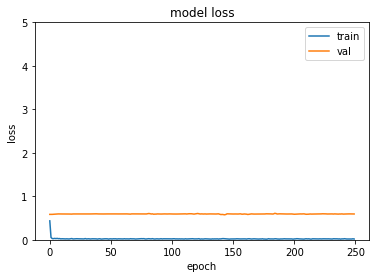

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


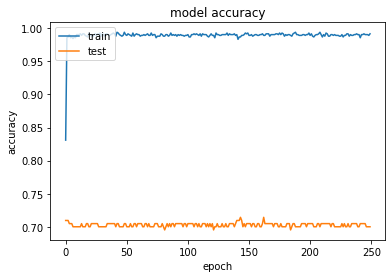

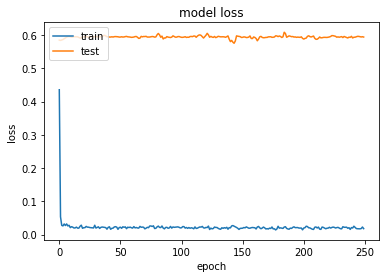

DNN results
accuracy : 0.9916666666666667
Training Recall: 0.9916666666666667
Training Precision: 0.9916979740277564
Confusion matrix: 
[[376   2]
 [  5 457]]
Validation set report:
cross Loss: -14.799193500337147
hing Loss: 0.7285714285714285
Report              precision    recall  f1-score   support

           0       0.65      0.75      0.70        93
           1       0.78      0.68      0.73       117

    accuracy                           0.71       210
   macro avg       0.72      0.72      0.71       210
weighted avg       0.72      0.71      0.72       210

accuracy : 0.7142857142857143
Validation Recall: 0.7142857142857143
Validation Precision: 0.7224519423956861
Confusion matrix: 
[[70 23]
 [37 80]]

\KNN Result

Train accuracy: 1.0
Training Recall: 1.0
Training Precision: 1.0


Validation accuracy: 0.7142857142857143
Validation Recall: 0.7142857142857143
Validation Precision: 0.7208163265306122

Train Confusion matrix:
 [[378   0]
 [  0 462]]
Validation Confusion matrix

In [ ]:
#split lda into train test 
"""

hing
 
cross Loss: 0.25
X = np.load('gdrive/My Drive/Python files/neuromarketing 25/features_psd_ALL.npy') # 2725

Standard

    batch_size = 128
    nb_epoch = 250 #3000
    l1_decay=0.00
    l2_decay=0.000 # .5
    # 0.01  0.06
    sigma=0.005
    in_drop_rate = .5
    drop_rate = .5#.05
    lr1=0.0001

"""
train_models(X, y, y_cat)

Before
(1050, 2724)
After
(840, 1)
Epoch 1/250
7/7 [==============================] - 1s 83ms/step - loss: 0.3680 - accuracy: 0.8679 - val_loss: 0.6343 - val_accuracy: 0.6762
Epoch 2/250
7/7 [==============================] - 0s 19ms/step - loss: 0.0585 - accuracy: 0.9845 - val_loss: 0.6406 - val_accuracy: 0.6762
Epoch 3/250
7/7 [==============================] - 0s 17ms/step - loss: 0.0453 - accuracy: 0.9810 - val_loss: 0.6422 - val_accuracy: 0.6762
Epoch 4/250
7/7 [==============================] - 0s 17ms/step - loss: 0.0389 - accuracy: 0.9810 - val_loss: 0.6414 - val_accuracy: 0.6762
Epoch 5/250
7/7 [==============================] - 0s 18ms/step - loss: 0.0322 - accuracy: 0.9845 - val_loss: 0.6387 - val_accuracy: 0.6810
Epoch 6/250
7/7 [==============================] - 0s 17ms/step - loss: 0.0402 - accuracy: 0.9821 - val_loss: 0.6351 - val_accuracy: 0.6810
Epoch 7/250
7/7 [==============================] - 0s 17ms/step - loss: 0.0316 - accuracy: 0.9869 - val_loss: 0.6343 - val_ac

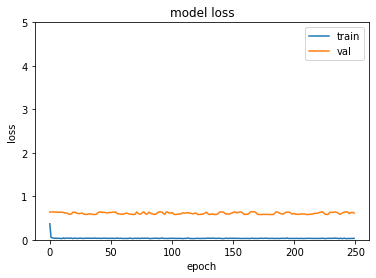

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


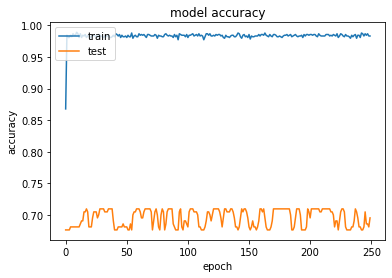

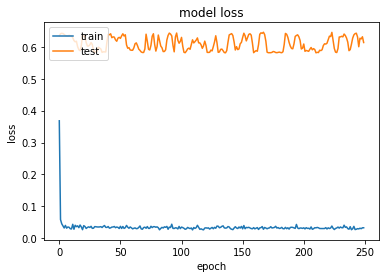

DNN results
accuracy : 0.9857142857142858
Training Recall: 0.9857142857142858
Training Precision: 0.9857451056895641
Confusion matrix: 
[[370   8]
 [  4 458]]
Validation set report:
cross Loss: -14.473271851312546
hing Loss: 0.7333333333333333
Report              precision    recall  f1-score   support

           0       0.67      0.69      0.68        93
           1       0.75      0.73      0.74       117

    accuracy                           0.71       210
   macro avg       0.71      0.71      0.71       210
weighted avg       0.71      0.71      0.71       210

accuracy : 0.7095238095238096
Validation Recall: 0.7095238095238096
Validation Precision: 0.7106516290726816
Confusion matrix: 
[[64 29]
 [32 85]]

\KNN Result

Train accuracy: 1.0
Training Recall: 1.0
Training Precision: 1.0


Validation accuracy: 0.7
Validation Recall: 0.7
Validation Precision: 0.7089869281045751

Train Confusion matrix:
 [[378   0]
 [  0 462]]
Validation Confusion matrix:
 [[69 24]
 [39 78]]


Suppor

In [ ]:
"""
LDA after split
hing
 
cross Loss: 0.25
X = np.load('gdrive/My Drive/Python files/neuromarketing 25/features_psd_ALL.npy') # 2724

Standard

    batch_size = 128
    nb_epoch = 250 #3000
    l1_decay=0.00
    l2_decay=0.000 # .5
    # 0.01  0.06
    sigma=0.005
    in_drop_rate = .5
    drop_rate = .5#.05
    lr1=0.0001

"""
train_models(X, y, y_cat)

Before selectoin
(1050, 2724)
After selectoin
(1050, 1)
Epoch 1/250
7/7 [==============================] - 1s 82ms/step - loss: 0.4060 - accuracy: 0.8702 - val_loss: 0.0125 - val_accuracy: 0.9952
Epoch 2/250
7/7 [==============================] - 3s 390ms/step - loss: 0.0387 - accuracy: 0.9929 - val_loss: 0.0106 - val_accuracy: 0.9952
Epoch 3/250
7/7 [==============================] - 0s 67ms/step - loss: 0.0173 - accuracy: 0.9929 - val_loss: 0.0101 - val_accuracy: 0.9952
Epoch 4/250
7/7 [==============================] - 0s 51ms/step - loss: 0.0162 - accuracy: 0.9929 - val_loss: 0.0099 - val_accuracy: 0.9952
Epoch 5/250
7/7 [==============================] - 0s 55ms/step - loss: 0.0208 - accuracy: 0.9905 - val_loss: 0.0098 - val_accuracy: 0.9952
Epoch 6/250
7/7 [==============================] - 0s 51ms/step - loss: 0.0192 - accuracy: 0.9929 - val_loss: 0.0098 - val_accuracy: 0.9952
Epoch 7/250
7/7 [==============================] - 0s 57ms/step - loss: 0.0155 - accuracy: 0.9929 - val

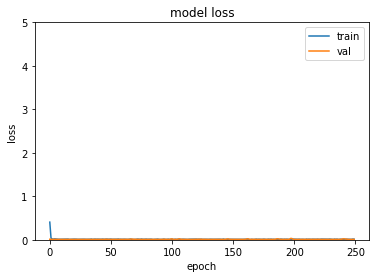

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


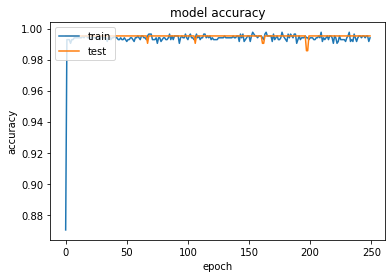

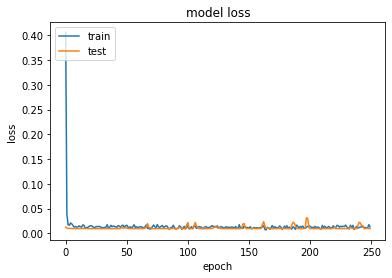

DNN results
accuracy : 0.9940476190476191
Training Recall: 0.9940476190476191
Training Precision: 0.9941113490364025
Confusion matrix: 
[[373   5]
 [  0 462]]
Validation set report:
cross Loss: -34.20983565194266
hing Loss: 0.44761904761904764
Report              precision    recall  f1-score   support

           0       0.99      1.00      0.99        93
           1       1.00      0.99      1.00       117

    accuracy                           1.00       210
   macro avg       0.99      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

accuracy : 0.9952380952380953
Validation Recall: 0.9952380952380953
Validation Precision: 0.9952887537993921
Confusion matrix: 
[[ 93   0]
 [  1 116]]

\KNN Result

Train accuracy: 1.0
Training Recall: 1.0
Training Precision: 1.0


Validation accuracy: 0.9952380952380953
Validation Recall: 0.9952380952380953
Validation Precision: 0.9952887537993921

Train Confusion matrix:
 [[378   0]
 [  0 462]]
Validation Confusion ma

In [ ]:
"""
LDA before split
hing
 
cross Loss: 0.25
X = np.load('gdrive/My Drive/Python files/neuromarketing 25/features_psd_ALL.npy') # 2724

Standard

    batch_size = 128
    nb_epoch = 250 #3000
    l1_decay=0.00
    l2_decay=0.000 # .5
    # 0.01  0.06
    sigma=0.005
    in_drop_rate = .5
    drop_rate = .5#.05
    lr1=0.0001

"""
train_models(X, y, y_cat)

Before
(1050, 2725)
After
(1050, 1)
(840, 2)
(210, 2)
Epoch 1/250
7/7 [==============================] - 1s 83ms/step - loss: 0.4026 - accuracy: 0.8583 - val_loss: 0.0101 - val_accuracy: 0.9952
Epoch 2/250
7/7 [==============================] - 3s 389ms/step - loss: 0.0219 - accuracy: 0.9988 - val_loss: 0.0096 - val_accuracy: 0.9952
Epoch 3/250
7/7 [==============================] - 3s 387ms/step - loss: 0.0122 - accuracy: 0.9988 - val_loss: 0.0095 - val_accuracy: 0.9952
Epoch 4/250
7/7 [==============================] - 1s 117ms/step - loss: 0.0119 - accuracy: 0.9964 - val_loss: 0.0095 - val_accuracy: 0.9952
Epoch 5/250
7/7 [==============================] - 3s 392ms/step - loss: 0.0089 - accuracy: 0.9988 - val_loss: 0.0095 - val_accuracy: 0.9952
Epoch 6/250
7/7 [==============================] - 0s 52ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 0.9952
Epoch 7/250
7/7 [==============================] - 2s 254ms/step - loss: 0.0056 - accuracy: 0.9988 - v

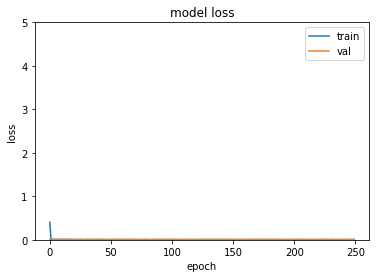

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


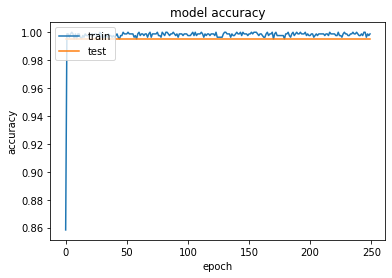

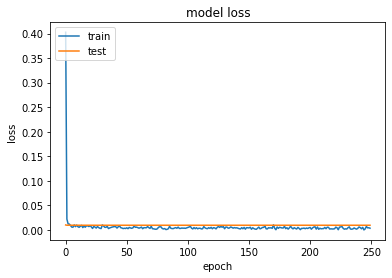

DNN results
accuracy : 1.0
Training Recall: 1.0
Training Precision: 1.0
Confusion matrix: 
[[378   0]
 [  0 462]]
Validation set report:
cross Loss: -34.209835670107886
hing Loss: 0.44761904761904764
Report              precision    recall  f1-score   support

           0       0.99      1.00      0.99        93
           1       1.00      0.99      1.00       117

    accuracy                           1.00       210
   macro avg       0.99      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

accuracy : 0.9952380952380953
Validation Recall: 0.9952380952380953
Validation Precision: 0.9952887537993921
Confusion matrix: 
[[ 93   0]
 [  1 116]]

\KNN Result

Train accuracy: 1.0
Training Recall: 1.0
Training Precision: 1.0


Validation accuracy: 0.9952380952380953
Validation Recall: 0.9952380952380953
Validation Precision: 0.9952887537993921

Train Confusion matrix:
 [[378   0]
 [  0 462]]
Validation Confusion matrix:
 [[ 93   0]
 [  1 116]]


Support vect

In [ ]:
"""
LDA before split
hing
 
cross Loss: 0.25
X = np.load('gdrive/My Drive/Python files/neuromarketing 25/features_psd_ALL.npy') # 2725

Standard

    batch_size = 128
    nb_epoch = 250 #3000
    l1_decay=0.00
    l2_decay=0.000 # .5
    # 0.01  0.06
    sigma=0.005
    in_drop_rate = .5
    drop_rate = .5#.05
    lr1=0.0001

"""
train_models(X, y, y_cat)

### PCA

Before selectoin
(1050, 2725)
After selectoin
(1050, 1050)
(210, 1050)
Epoch 1/250
7/7 [==============================] - 0s 68ms/step - loss: 0.9916 - accuracy: 0.5179 - val_loss: 0.9783 - val_accuracy: 0.4667
Epoch 2/250
7/7 [==============================] - 1s 111ms/step - loss: 0.9123 - accuracy: 0.5571 - val_loss: 0.8630 - val_accuracy: 0.6476
Epoch 3/250
7/7 [==============================] - 0s 59ms/step - loss: 0.8017 - accuracy: 0.6536 - val_loss: 0.7797 - val_accuracy: 0.7238
Epoch 4/250
7/7 [==============================] - 0s 50ms/step - loss: 0.7643 - accuracy: 0.6881 - val_loss: 0.7124 - val_accuracy: 0.7333
Epoch 5/250
7/7 [==============================] - 0s 55ms/step - loss: 0.7186 - accuracy: 0.6952 - val_loss: 0.6477 - val_accuracy: 0.7667
Epoch 6/250
7/7 [==============================] - 0s 64ms/step - loss: 0.6439 - accuracy: 0.7262 - val_loss: 0.5918 - val_accuracy: 0.7857
Epoch 7/250
7/7 [==============================] - 1s 137ms/step - loss: 0.6112 - accura

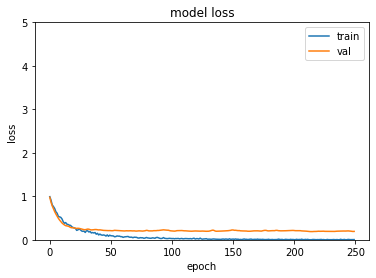

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


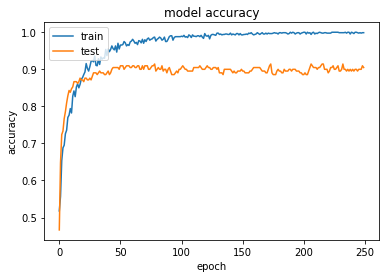

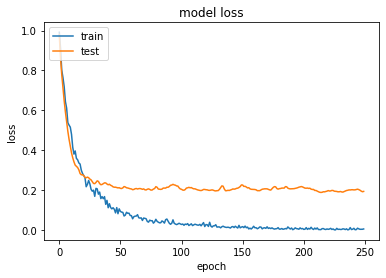

DNN results
accuracy : 1.0
Training Recall: 1.0
Training Precision: 1.0
Confusion matrix: 
[[378   0]
 [  0 462]]
Validation set report:
cross Loss: -28.27431755065918
hing Loss: 0.5333333333333333
Report              precision    recall  f1-score   support

           0       0.90      0.89      0.90        93
           1       0.92      0.92      0.92       117

    accuracy                           0.91       210
   macro avg       0.91      0.91      0.91       210
weighted avg       0.91      0.91      0.91       210

accuracy : 0.9095238095238095
Validation Recall: 0.9095238095238095
Validation Precision: 0.9094615222655017
Confusion matrix: 
[[ 83  10]
 [  9 108]]

\KNN Result

Train accuracy: 1.0
Training Recall: 1.0
Training Precision: 1.0


Validation accuracy: 0.8095238095238095
Validation Recall: 0.8095238095238095
Validation Precision: 0.8160544217687075

Train Confusion matrix:
 [[378   0]
 [  0 462]]
Validation Confusion matrix:
 [[79 14]
 [26 91]]


Support vector mac

In [ ]:
"""
PCA with LDa classifier
hing
 
cross Loss: 0.25
X = np.load('gdrive/My Drive/Python files/neuromarketing 25/features_psd_ALL.npy') # 2725

Standard

    batch_size = 128
    nb_epoch = 250 #3000
    l1_decay=0.00
    l2_decay=0.000 # .5
    # 0.01  0.06
    sigma=0.005
    in_drop_rate = .5
    drop_rate = .5#.05
    lr1=0.0001

"""
train_models(X, y, y_cat)

Before selectoin
(1050, 2725)
After selectoin
(1050, 1050)
Epoch 1/250
7/7 [==============================] - 1s 77ms/step - loss: 0.9428 - accuracy: 0.5369 - val_loss: 0.9259 - val_accuracy: 0.6333
Epoch 2/250
7/7 [==============================] - 0s 66ms/step - loss: 0.8407 - accuracy: 0.6250 - val_loss: 0.8401 - val_accuracy: 0.7190
Epoch 3/250
7/7 [==============================] - 1s 117ms/step - loss: 0.8068 - accuracy: 0.6369 - val_loss: 0.7543 - val_accuracy: 0.7952
Epoch 4/250
7/7 [==============================] - 2s 222ms/step - loss: 0.7076 - accuracy: 0.7048 - val_loss: 0.6835 - val_accuracy: 0.7857
Epoch 5/250
7/7 [==============================] - 0s 64ms/step - loss: 0.6708 - accuracy: 0.6988 - val_loss: 0.6372 - val_accuracy: 0.7667
Epoch 6/250
7/7 [==============================] - 0s 61ms/step - loss: 0.6160 - accuracy: 0.7381 - val_loss: 0.5911 - val_accuracy: 0.7667
Epoch 7/250
7/7 [==============================] - 0s 62ms/step - loss: 0.5732 - accuracy: 0.7512 -

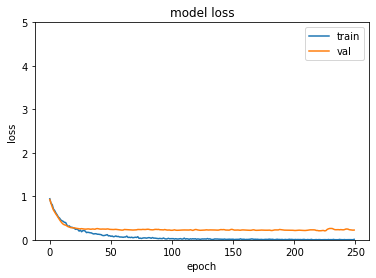

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


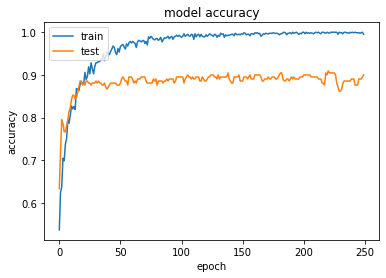

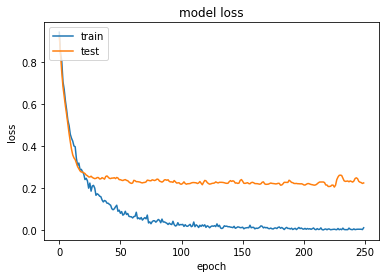

DNN results
accuracy : 1.0
Training Recall: 1.0
Training Precision: 1.0
Confusion matrix: 
[[378   0]
 [  0 462]]
Validation set report:
cross Loss: -28.105729996874217
hing Loss: 0.5380952380952381
Report              precision    recall  f1-score   support

           0       0.90      0.88      0.89        93
           1       0.91      0.92      0.92       117

    accuracy                           0.90       210
   macro avg       0.90      0.90      0.90       210
weighted avg       0.90      0.90      0.90       210

accuracy : 0.9047619047619048
Validation Recall: 0.9047619047619048
Validation Precision: 0.9047003416751317
Confusion matrix: 
[[ 82  11]
 [  9 108]]

\KNN Result

Train accuracy: 1.0
Training Recall: 1.0
Training Precision: 1.0


Validation accuracy: 0.8095238095238095
Validation Recall: 0.8095238095238095
Validation Precision: 0.8160544217687075

Train Confusion matrix:
 [[378   0]
 [  0 462]]
Validation Confusion matrix:
 [[79 14]
 [26 91]]


Support vector ma

In [ ]:
"""
PCA 
hing
 
cross Loss: 0.25
X = np.load('gdrive/My Drive/Python files/neuromarketing 25/features_psd_ALL.npy') # 2725

Standard

    batch_size = 128
    nb_epoch = 250 #3000
    l1_decay=0.00
    l2_decay=0.000 # .5
    # 0.01  0.06
    sigma=0.005
    in_drop_rate = .5
    drop_rate = .5#.05
    lr1=0.0001

"""
train_models(X, y, y_cat)

### importance

Before selectoin
(1050, 30)
After selectoin
(1050, 30)
(210, 30)
Epoch 1/250
7/7 [==============================] - 0s 58ms/step - loss: 0.8358 - accuracy: 0.6238 - val_loss: 0.5379 - val_accuracy: 0.8429
Epoch 2/250
7/7 [==============================] - 3s 395ms/step - loss: 0.4683 - accuracy: 0.8488 - val_loss: 0.4025 - val_accuracy: 0.8381
Epoch 3/250
7/7 [==============================] - 0s 45ms/step - loss: 0.3514 - accuracy: 0.8810 - val_loss: 0.3362 - val_accuracy: 0.8524
Epoch 4/250
7/7 [==============================] - 0s 47ms/step - loss: 0.2377 - accuracy: 0.9214 - val_loss: 0.2932 - val_accuracy: 0.8667
Epoch 5/250
7/7 [==============================] - 0s 45ms/step - loss: 0.2343 - accuracy: 0.9024 - val_loss: 0.2639 - val_accuracy: 0.8810
Epoch 6/250
7/7 [==============================] - 0s 45ms/step - loss: 0.2067 - accuracy: 0.9214 - val_loss: 0.2398 - val_accuracy: 0.8857
Epoch 7/250
7/7 [==============================] - 0s 44ms/step - loss: 0.1953 - accuracy: 0.9

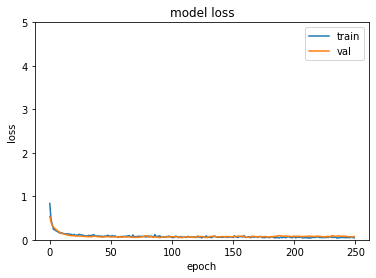

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


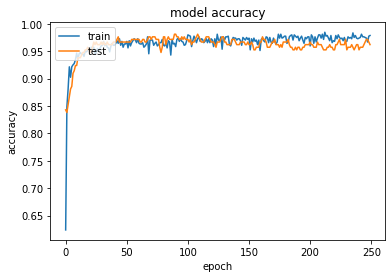

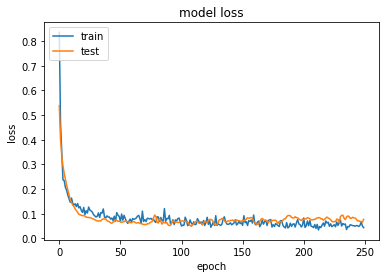

DNN results
accuracy : 0.9845238095238096
Training Recall: 0.9845238095238096
Training Precision: 0.9845376344086021
Confusion matrix: 
[[370   8]
 [  5 457]]
Validation set report:
cross Loss: -33.176230421520415
hing Loss: 0.46190476190476193
Report              precision    recall  f1-score   support

           0       0.99      0.97      0.98        93
           1       0.97      0.99      0.98       117

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210

accuracy : 0.9809523809523809
Validation Recall: 0.9809523809523809
Validation Precision: 0.981087819743282
Confusion matrix: 
[[ 90   3]
 [  1 116]]

\KNN Result

Train accuracy: 1.0
Training Recall: 1.0
Training Precision: 1.0


Validation accuracy: 0.9285714285714286
Validation Recall: 0.9285714285714286
Validation Precision: 0.9286893407399643

Train Confusion matrix:
 [[378   0]
 [  0 462]]
Validation Confusion ma

In [ ]:
idx_IN_columns =[2181, 2184, 2171, 2632, 2620, 2277, 2179, 2177, 202, 2714, 2182, 2183, 2622, 2624, 2625, 2626, 2617, 201, 2178, 2618, 2715, 2716, 2717, 2619, 2719, 2720, 2621, 2623, 2723,  2724]
# # top 30 mutual_info_classif


X_copy = X
X = X[:,idx_IN_columns]

train_models(X, y, y_cat)


Before selectoin
(1050, 20)
After selectoin
(1050, 20)
(210, 20)
Epoch 1/250
7/7 [==============================] - 0s 65ms/step - loss: 0.7991 - accuracy: 0.6417 - val_loss: 0.6004 - val_accuracy: 0.8381
Epoch 2/250
7/7 [==============================] - 3s 385ms/step - loss: 0.4611 - accuracy: 0.8286 - val_loss: 0.3559 - val_accuracy: 0.8667
Epoch 3/250
7/7 [==============================] - 3s 397ms/step - loss: 0.3250 - accuracy: 0.8821 - val_loss: 0.2861 - val_accuracy: 0.8762
Epoch 4/250
7/7 [==============================] - 0s 45ms/step - loss: 0.2553 - accuracy: 0.9048 - val_loss: 0.2502 - val_accuracy: 0.8857
Epoch 5/250
7/7 [==============================] - 0s 43ms/step - loss: 0.2114 - accuracy: 0.9226 - val_loss: 0.2268 - val_accuracy: 0.9048
Epoch 6/250
7/7 [==============================] - 0s 47ms/step - loss: 0.2013 - accuracy: 0.9155 - val_loss: 0.2076 - val_accuracy: 0.9095
Epoch 7/250
7/7 [==============================] - 0s 58ms/step - loss: 0.1962 - accuracy: 0.

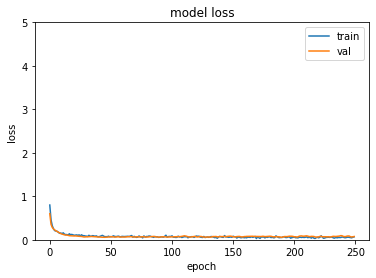

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


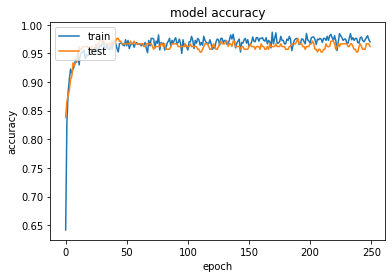

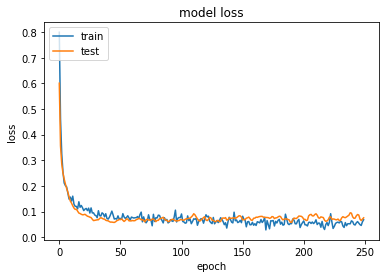

DNN results
accuracy : 0.9904761904761905
Training Recall: 0.9904761904761905
Training Precision: 0.9904761904761905
Confusion matrix: 
[[374   4]
 [  4 458]]
Validation set report:
cross Loss: -32.72422973967734
hing Loss: 0.4666666666666667
Report              precision    recall  f1-score   support

           0       0.98      0.97      0.97        93
           1       0.97      0.98      0.98       117

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210

accuracy : 0.9761904761904762
Validation Recall: 0.9761904761904762
Validation Precision: 0.9762080218970417
Confusion matrix: 
[[ 90   3]
 [  2 115]]

\KNN Result

Train accuracy: 1.0
Training Recall: 1.0
Training Precision: 1.0


Validation accuracy: 0.9285714285714286
Validation Recall: 0.9285714285714286
Validation Precision: 0.9286893407399643

Train Confusion matrix:
 [[378   0]
 [  0 462]]
Validation Confusion mat

In [ ]:
# # top 20 mutual_info_classif

idx_IN_columns = [2177,  2625, 2183,  2622, 2182,  201, 2617,  2624, 2178,  2619, 2715,  2716, 2717,  2618, 2719,  2720, 2621,  2623, 2723,  2724]

X_copy = X
X = X[:,idx_IN_columns]

train_models(X, y, y_cat)


Before selectoin
(1050, 10)
After selectoin
(1050, 10)
(210, 10)
Epoch 1/250
7/7 [==============================] - 0s 58ms/step - loss: 0.7840 - accuracy: 0.6476 - val_loss: 0.4865 - val_accuracy: 0.8571
Epoch 2/250
7/7 [==============================] - 3s 387ms/step - loss: 0.4043 - accuracy: 0.8583 - val_loss: 0.3243 - val_accuracy: 0.8857
Epoch 3/250
7/7 [==============================] - 0s 54ms/step - loss: 0.2721 - accuracy: 0.9048 - val_loss: 0.2491 - val_accuracy: 0.8905
Epoch 4/250
7/7 [==============================] - 0s 52ms/step - loss: 0.2354 - accuracy: 0.9107 - val_loss: 0.2121 - val_accuracy: 0.9143
Epoch 5/250
7/7 [==============================] - 0s 41ms/step - loss: 0.1860 - accuracy: 0.9298 - val_loss: 0.1846 - val_accuracy: 0.9190
Epoch 6/250
7/7 [==============================] - 0s 50ms/step - loss: 0.1756 - accuracy: 0.9286 - val_loss: 0.1671 - val_accuracy: 0.9333
Epoch 7/250
7/7 [==============================] - 0s 46ms/step - loss: 0.1497 - accuracy: 0.9

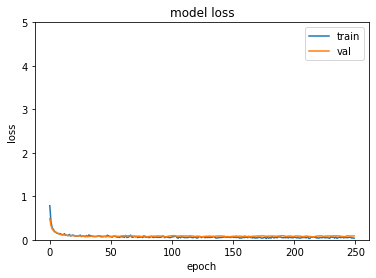

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


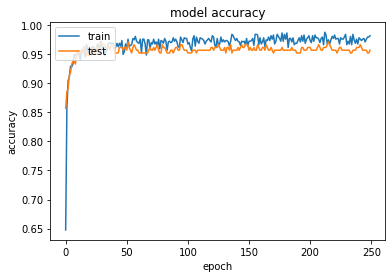

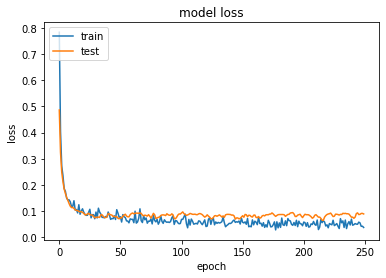

DNN results
accuracy : 0.9880952380952381
Training Recall: 0.9880952380952381
Training Precision: 0.9882963182762321
Confusion matrix: 
[[377   1]
 [  9 453]]
Validation set report:
cross Loss: -32.3948865954365
hing Loss: 0.47619047619047616
Report              precision    recall  f1-score   support

           0       0.96      0.97      0.96        93
           1       0.97      0.97      0.97       117

    accuracy                           0.97       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.97      0.97      0.97       210

accuracy : 0.9666666666666667
Validation Recall: 0.9666666666666667
Validation Precision: 0.9667461482024945
Confusion matrix: 
[[ 90   3]
 [  4 113]]

\KNN Result

Train accuracy: 1.0
Training Recall: 1.0
Training Precision: 1.0


Validation accuracy: 0.9428571428571428
Validation Recall: 0.9428571428571428
Validation Precision: 0.9437538285088691

Train Confusion matrix:
 [[378   0]
 [  0 462]]
Validation Confusion mat

In [ ]:
# # top 10 mutual_info_classif
idx_IN_columns = [2618, 2621, 2723, 2719, 2716, 2720, 2717, 2623, 2724, 2715]
#importance

train_models(X, y, y_cat)

### ANOVA

In [ ]:
#https://machinelearningmastery.com/feature-selection-with-numerical-input-data/
# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

## classification (LDA)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# define model
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y_cat, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


Mean Accuracy: 0.689 (0.043)


In [ ]:
#CV=5
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


Mean Accuracy: 0.662 (0.050)


Before selectoin
(1050, 2725)
After selectoin
(1050, 2725)
Epoch 1/250
7/7 [==============================] - 1s 93ms/step - loss: 0.9548 - accuracy: 0.5393 - val_loss: 0.9152 - val_accuracy: 0.6619
Epoch 2/250
7/7 [==============================] - 1s 72ms/step - loss: 0.8505 - accuracy: 0.6238 - val_loss: 0.8140 - val_accuracy: 0.7762
Epoch 3/250
7/7 [==============================] - 1s 128ms/step - loss: 0.7440 - accuracy: 0.6667 - val_loss: 0.7390 - val_accuracy: 0.7476
Epoch 4/250
7/7 [==============================] - 2s 245ms/step - loss: 0.6830 - accuracy: 0.7083 - val_loss: 0.6547 - val_accuracy: 0.8048
Epoch 5/250
7/7 [==============================] - 1s 83ms/step - loss: 0.6178 - accuracy: 0.7429 - val_loss: 0.5784 - val_accuracy: 0.8286
Epoch 6/250
7/7 [==============================] - 1s 72ms/step - loss: 0.5365 - accuracy: 0.7667 - val_loss: 0.5117 - val_accuracy: 0.8429
Epoch 7/250
7/7 [==============================] - 1s 121ms/step - loss: 0.5135 - accuracy: 0.7798 

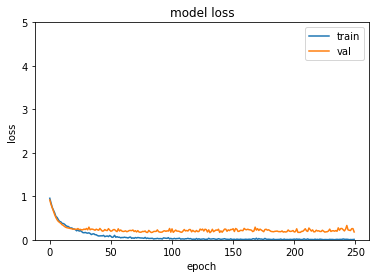

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


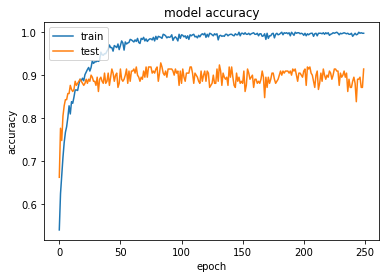

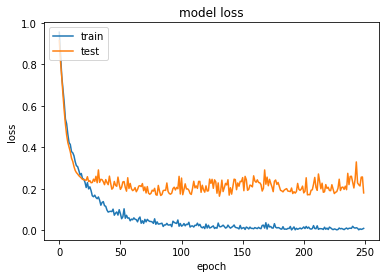

DNN results
accuracy : 1.0
Training Recall: 1.0
Training Precision: 1.0
Confusion matrix: 
[[378   0]
 [  0 462]]
Validation set report:
cross Loss: -29.26294453938802
hing Loss: 0.5190476190476191
Report              precision    recall  f1-score   support

           0       0.92      0.90      0.91        93
           1       0.92      0.94      0.93       117

    accuracy                           0.92       210
   macro avg       0.92      0.92      0.92       210
weighted avg       0.92      0.92      0.92       210

accuracy : 0.9238095238095239
Validation Recall: 0.9238095238095239
Validation Precision: 0.9237972111921693
Confusion matrix: 
[[ 84   9]
 [  7 110]]

\KNN Result

Train accuracy: 1.0
Training Recall: 1.0
Training Precision: 1.0


Validation accuracy: 0.8095238095238095
Validation Recall: 0.8095238095238095
Validation Precision: 0.8160544217687075

Train Confusion matrix:
 [[378   0]
 [  0 462]]
Validation Confusion matrix:
 [[79 14]
 [26 91]]


Support vector mac

In [ ]:
#train_lda 

train_models(X, y, y_cat)

# DWT

## feature selection 

In [ ]:
#MRMRM on 30 feature
train_models(X, y, y_cat)

In [ ]:
"""
LDA After split
hing
 
X = np.load('gdrive/My Drive/Python files/neuromarketing 25/features_DWT

Standard

    batch_size = 128
    nb_epoch = 250 #3000
    l1_decay=0.00
    l2_decay=0.000 # .5
    # 0.01  0.06
    sigma=0.005
    in_drop_rate = .5
    drop_rate = .5#.05
    lr1=0.0001

"""
train_models(X, y, y_cat)

After
(840, 1)
(840, 2)
(210, 2)
Epoch 1/250
7/7 [==============================] - 0s 60ms/step - loss: 0.4561 - accuracy: 0.8405 - val_loss: 0.6295 - val_accuracy: 0.6857
Epoch 2/250
7/7 [==============================] - 0s 10ms/step - loss: 0.1359 - accuracy: 0.9440 - val_loss: 0.6318 - val_accuracy: 0.6857
Epoch 3/250
7/7 [==============================] - 0s 9ms/step - loss: 0.1114 - accuracy: 0.9536 - val_loss: 0.6376 - val_accuracy: 0.6762
Epoch 4/250
7/7 [==============================] - 0s 10ms/step - loss: 0.1014 - accuracy: 0.9560 - val_loss: 0.6422 - val_accuracy: 0.6762
Epoch 5/250
7/7 [==============================] - 0s 8ms/step - loss: 0.0894 - accuracy: 0.9571 - val_loss: 0.6443 - val_accuracy: 0.6714
Epoch 6/250
7/7 [==============================] - 0s 8ms/step - loss: 0.0879 - accuracy: 0.9560 - val_loss: 0.6438 - val_accuracy: 0.6762
Epoch 7/250
7/7 [==============================] - 0s 9ms/step - loss: 0.0888 - accuracy: 0.9595 - val_loss: 0.6418 - val_accuracy

Before
(1050, 505)
After
(1050, 1)
(840, 2)
(210, 2)
Epoch 1/250
7/7 [==============================] - 0s 61ms/step - loss: 0.5015 - accuracy: 0.8143 - val_loss: 0.1474 - val_accuracy: 0.9333
Epoch 2/250
7/7 [==============================] - 3s 392ms/step - loss: 0.1769 - accuracy: 0.9190 - val_loss: 0.1418 - val_accuracy: 0.9333
Epoch 3/250
7/7 [==============================] - 0s 57ms/step - loss: 0.1623 - accuracy: 0.9238 - val_loss: 0.1415 - val_accuracy: 0.9333
Epoch 4/250
7/7 [==============================] - 0s 13ms/step - loss: 0.1423 - accuracy: 0.9381 - val_loss: 0.1456 - val_accuracy: 0.9286
Epoch 5/250
7/7 [==============================] - 0s 11ms/step - loss: 0.1392 - accuracy: 0.9333 - val_loss: 0.1512 - val_accuracy: 0.9286
Epoch 6/250
7/7 [==============================] - 0s 11ms/step - loss: 0.1433 - accuracy: 0.9333 - val_loss: 0.1559 - val_accuracy: 0.9238
Epoch 7/250
7/7 [==============================] - 0s 10ms/step - loss: 0.1424 - accuracy: 0.9286 - val_lo

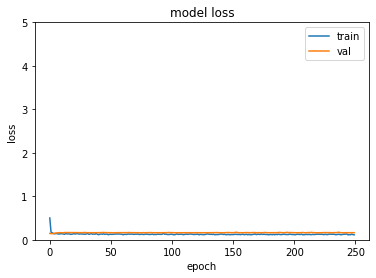

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


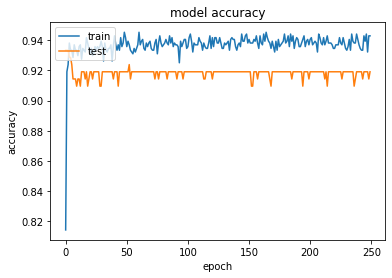

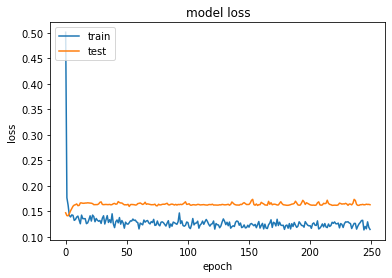

DNN results
accuracy : 0.9285714285714286
Training Recall: 0.9285714285714286
Training Precision: 0.9301250000000001
Confusion matrix: 
[[359  19]
 [ 41 421]]
Validation set report:
cross Loss: -29.91938071477981
hing Loss: 0.5095238095238095
Report              precision    recall  f1-score   support

           0       0.89      0.97      0.93        93
           1       0.97      0.91      0.94       117

    accuracy                           0.93       210
   macro avg       0.93      0.94      0.93       210
weighted avg       0.94      0.93      0.93       210

accuracy : 0.9333333333333333
Validation Recall: 0.9333333333333333
Validation Precision: 0.9364338268689255
Confusion matrix: 
[[ 90   3]
 [ 11 106]]

\KNN Result

Train accuracy: 1.0
Training Recall: 1.0
Training Precision: 1.0


Validation accuracy: 0.9047619047619048
Validation Recall: 0.9047619047619048
Validation Precision: 0.9051193200392285

Train Confusion matrix:
 [[378   0]
 [  0 462]]
Validation Confusion mat

In [ ]:
"""
LDA before split
hing
 
X = np.load('gdrive/My Drive/Python files/neuromarketing 25/features_DWT

Standard

    batch_size = 128
    nb_epoch = 250 #3000
    l1_decay=0.00
    l2_decay=0.000 # .5
    # 0.01  0.06
    sigma=0.005
    in_drop_rate = .5
    drop_rate = .5#.05
    lr1=0.0001

"""
train_models(X, y, y_cat)

Before
(1050, 505)
After
(1050, 505)
(840, 2)
(210, 2)
Epoch 1/250
7/7 [==============================] - 0s 63ms/step - loss: 0.9676 - accuracy: 0.5452 - val_loss: 0.9763 - val_accuracy: 0.6524
Epoch 2/250
7/7 [==============================] - 3s 448ms/step - loss: 0.9163 - accuracy: 0.5405 - val_loss: 0.9512 - val_accuracy: 0.6667
Epoch 3/250
7/7 [==============================] - 0s 56ms/step - loss: 0.8732 - accuracy: 0.5917 - val_loss: 0.9359 - val_accuracy: 0.5714
Epoch 4/250
7/7 [==============================] - 0s 53ms/step - loss: 0.8234 - accuracy: 0.6083 - val_loss: 0.9264 - val_accuracy: 0.5476
Epoch 5/250
7/7 [==============================] - 0s 54ms/step - loss: 0.7679 - accuracy: 0.6381 - val_loss: 0.9185 - val_accuracy: 0.5333
Epoch 6/250
7/7 [==============================] - 0s 60ms/step - loss: 0.7162 - accuracy: 0.6857 - val_loss: 0.9058 - val_accuracy: 0.5476
Epoch 7/250
7/7 [==============================] - 1s 99ms/step - loss: 0.6530 - accuracy: 0.6964 - val_

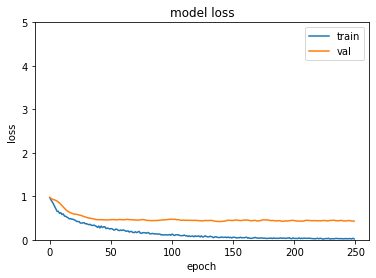

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


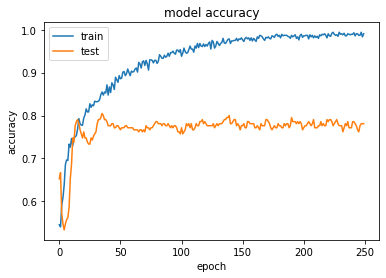

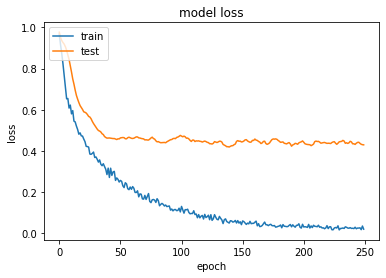

DNN results
accuracy : 0.9892857142857143
Training Recall: 0.9892857142857143
Training Precision: 0.9892859393529686
Confusion matrix: 
[[373   5]
 [  4 458]]
Validation set report:
cross Loss: -20.539179774693082
hing Loss: 0.6428571428571429
Report              precision    recall  f1-score   support

           0       0.76      0.81      0.78        93
           1       0.84      0.79      0.82       117

    accuracy                           0.80       210
   macro avg       0.80      0.80      0.80       210
weighted avg       0.80      0.80      0.80       210

accuracy : 0.8
Validation Recall: 0.8
Validation Precision: 0.8022932022932022
Confusion matrix: 
[[75 18]
 [24 93]]

\KNN Result

Train accuracy: 1.0
Training Recall: 1.0
Training Precision: 1.0


Validation accuracy: 0.7285714285714285
Validation Recall: 0.7285714285714285
Validation Precision: 0.7275867575047904

Train Confusion matrix:
 [[378   0]
 [  0 462]]
Validation Confusion matrix:
 [[62 31]
 [26 91]]


Suppor

In [ ]:
"""
pca before split
hing
 
X = np.load('gdrive/My Drive/Python files/neuromarketing 25/features_DWT

Standard

    batch_size = 128
    nb_epoch = 250 #3000
    l1_decay=0.00
    l2_decay=0.000 # .5
    # 0.01  0.06
    sigma=0.005
    in_drop_rate = .5
    drop_rate = .5#.05
    lr1=0.0001

"""
train_models(X, y, y_cat)